# Data processing
In this part we filtered out 15132 genes that are detected in less than 3 cells, and save it as whole data set((6648 cells, 17154 genes).

In [1]:
!pip install scanpy
import numpy as np
import pandas as pd
import scanpy as sc
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.8.1 pandas==1.2.4 scikit-learn==1.1.1 statsmodels==0.14.0rc0 python-igraph==0.10.4 pynndescent==0.5.10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [2]:
maledataRR = sc.read_mtx('male.mtx')
femaledataRR = sc.read_mtx('female.mtx')
fff=pd.read_csv('female.tsv',sep='\t',header=None)
mmm=pd.read_csv('male.tsv',sep='\t',header=None)
fff
frames = [fff, mmm]
name=pd.concat(frames,axis=0)
femaledata=femaledataRR.T
maledata=maledataRR.T
femaledata.var.index = fff[1]
maledata.var.index = mmm[1]
femaledata.var
femaledata.obs_names = [f"Cell_{2685+i:d}" for i in range(femaledata.n_obs)]
maledata.obs_names = [f"Cell_{i:d}" for i in range(maledata.n_obs)]

In [3]:
maledata
ct = np.random.choice(["1"], size=(maledata.n_obs,))
maledata.obs["gender"] = pd.Categorical(ct)  # Categoricals are preferred for efficiency
maledata.obs
femaledata
ct = np.random.choice(["0"], size=(femaledata.n_obs,))
femaledata.obs["gender"] = pd.Categorical(ct)  # Categoricals are preferred for efficiency
femaledata.obs

,gender
Cell_2685,0
Cell_2686,0
Cell_2687,0
Cell_2688,0
Cell_2689,0
...,...
Cell_6643,0
Cell_6644,0
Cell_6645,0
Cell_6646,0


In [4]:
import anndata
fw=femaledata.X.todense()
maledata
fr=maledata.X.todense()


In [5]:
fr.shape

(2685, 32285)

In [6]:
!pip install AnnData

In [7]:
import anndata

In [8]:
x_combined = np.concatenate([fr,fw],axis=0)#male在先
adata_combined = anndata.AnnData(x_combined)  #用新的np array重新构造anndata


In [9]:
adata_combined.var.index = fff[1]
adata_combined.obs_names = [f"Cell_{i:d}" for i in range(adata_combined.n_obs)]

In [10]:
c11 = np.ones(maledata.n_obs)
c22= np.zeros(femaledata.n_obs)
# femaledata.obs["gender"] = pd.Categorical(ct)  # Categoricals are preferred for efficiency
# femaledata.obs
joined_list = [*c11, *c22]


In [11]:
adata_combined.obs["gender"] = pd.Categorical(joined_list)  # Categoricals are preferred for efficiency
adata_combined.obs

,gender
Cell_0,1.0
Cell_1,1.0
Cell_2,1.0
Cell_3,1.0
Cell_4,1.0
...,...
Cell_6643,0.0
Cell_6644,0.0
Cell_6645,0.0
Cell_6646,0.0


In [12]:
adata=adata_combined
adata.var.index=fff[1]

In [13]:
pip install matplotlib==3.1.3

Note: you may need to restart the kernel to use updated packages.


In [14]:
adata.X=np.asarray(adata.X)

In [15]:
adata.X

array([[0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
adata.obs['gender']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Cell_0       1.0
Cell_1       1.0
Cell_2       1.0
Cell_3       1.0
Cell_4       1.0
            ... 
Cell_6643    0.0
Cell_6644    0.0
Cell_6645    0.0
Cell_6646    0.0
Cell_6647    0.0
Name: gender, Length: 6648, dtype: category
Categories (2, float64): [0.0, 1.0]

normalizing counts per cell
    finished (0:00:00)


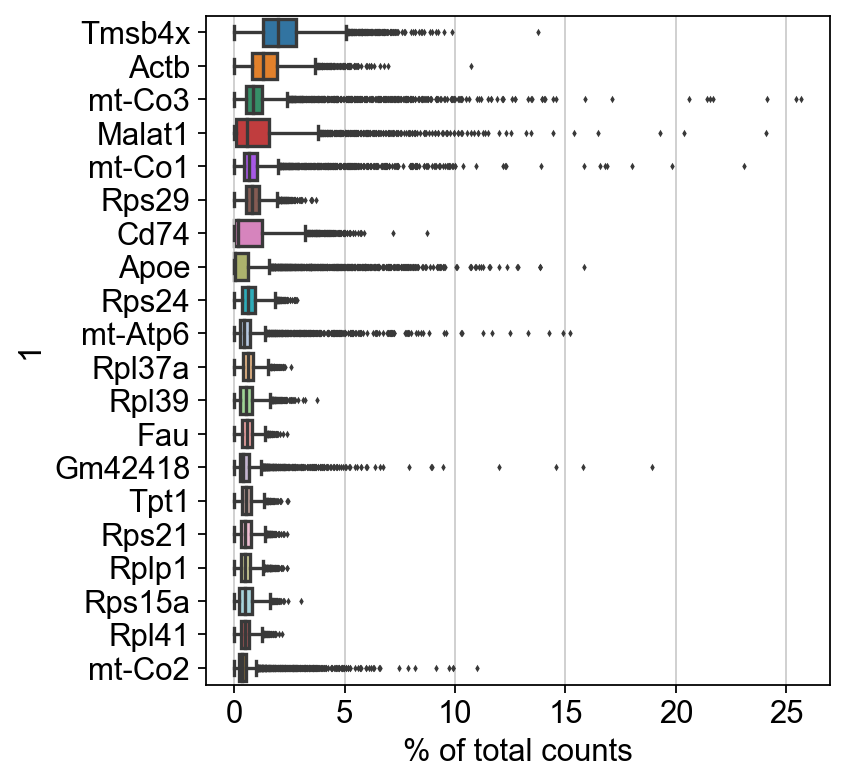

In [17]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [18]:
type(adata.X)

numpy.ndarray

In [19]:
adata.X

array([[0., 0., 0., ..., 0., 0., 2.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [20]:
adata.var.index.name ="n"
sc.pp.filter_genes(adata, min_cells=3)
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var_names_make_unique()

filtered out 15132 genes that are detected in less than 3 cells


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


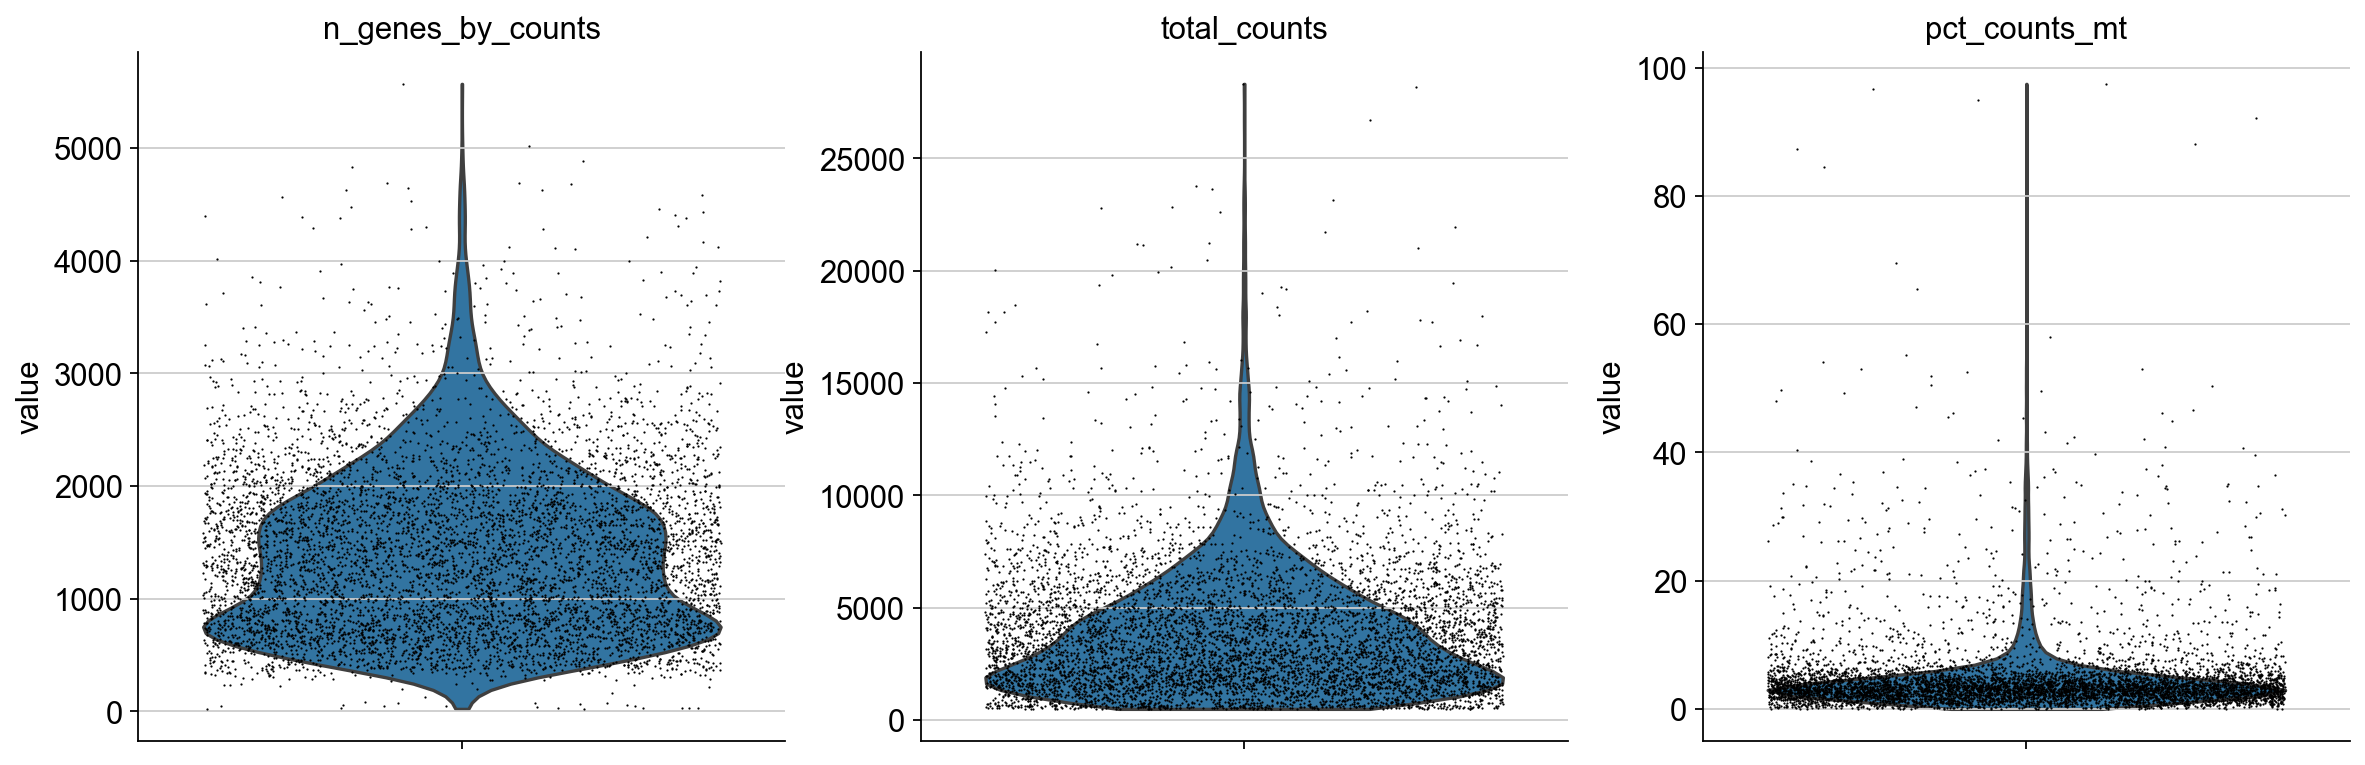

In [21]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)


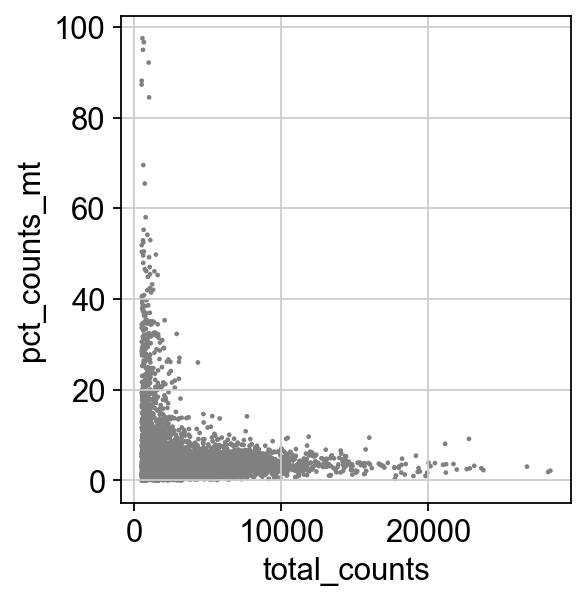

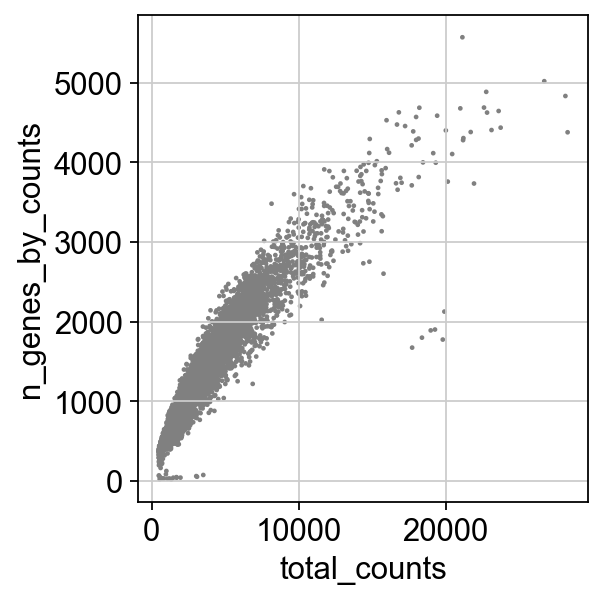

In [22]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


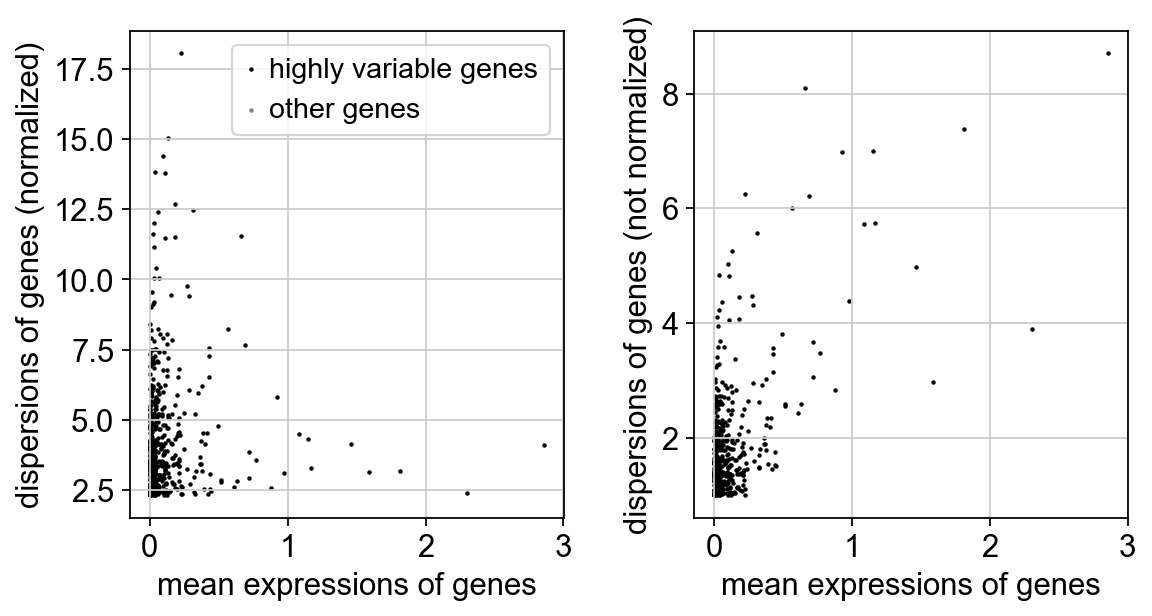

In [23]:

sc.pp.log1p(adata)
# sc.pp.log1p(maledata)
# sc.pp.highly_variable_genes(femaledata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# Compute highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=500)
# Filter the data matrix to include only highly variable genes
adata = adata[:, adata.var['highly_variable']]

 
sc.pl.highly_variable_genes(adata)

In [24]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


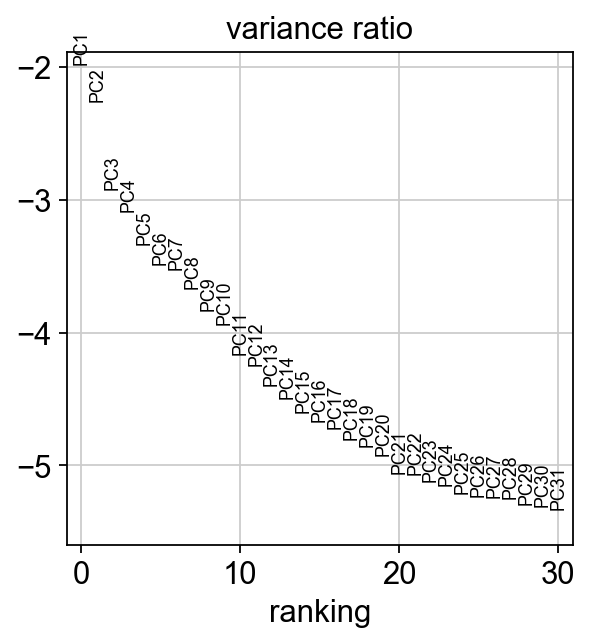

In [25]:
sc.pl.pca_variance_ratio(adata, log=True)

In [26]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [27]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


In [28]:
adata.layers["log_transformed"] = np.log1p(adata.X)
#maledata.layers["log_transformed"] = np.log1p(maledata.X)

rc=adata.to_df(layer="log_transformed")
rc["y"] = pd.Categorical(joined_list)

convert matrix to dataframe with label y--gender(1 for male and 0 for female)

In [29]:
rc.shape

(6648, 501)

In [30]:
import numpy as np
import scanpy as sc
import pandas as pd
#import gdown

from anndata.experimental.multi_files import AnnCollection

from sklearn.model_selection import train_test_split
from sklearn.decomposition import IncrementalPCA

import warnings
warnings.simplefilter(action="ignore", category=pd.core.common.SettingWithCopyWarning)

how do i convert anncollection to anndata?????

In [31]:
# maledata.layers["log_transformed"] = np.log1p(maledata.X)
# maledata
# mem=maledata.to_df(layer="log_transformed")
# femaledata.layers["log_transformed"] = np.log1p(femaledata.X)
# femaledata
# fem=femaledata.to_df(layer="log_transformed")

In [32]:
# lfem=len(fem. index)
# lem=len(mem. index)

In [33]:
# import numpy
# archi=numpy.zeros(lfem)
# fem['y']=archi
# import numpy
# archi=numpy.ones(lem)
# mem['y']=archi

In [34]:
# fem

In [35]:
# frames = [mem, fem]
# rc=pd.concat(frames,axis=0)


In [36]:
# rc


#test data prepare
Here we separate our data in to training data and testing data at a proportion of 6:4,  60% randomly chosen cell data are used to train model, and we use the rest 40% data to verify and test the accuracy of our model.

In [37]:
training_data = rc.sample(frac=0.6, random_state=25)
testing_data = rc.drop(training_data.index)
Y_train=training_data["y"]
X_train=training_data.drop(["y"],axis=1)
Y_test=testing_data["y"]
X_test=testing_data.drop(["y"],axis=1)


randomly choosing training data and testing data with proportion of 6:4

In [38]:
testing_data

n,Sulf1,Khdc1a,Il1r2,Il1rl1,Ecrg4,Col3a1,Col5a2,Slc40a1,Cavin2,Icos,...,Ms4a2,Gda,Ifit1,Kif11,Tspan7,Cfp,Bgn,Vsig4,Alas2,y
Cell_3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.526589,0.0,0.0,0.0,1.0
Cell_8,0.0,0.526589,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0
Cell_10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.526589,0.0,0.000000,0.526589,0.0,0.0,0.0,1.0
Cell_11,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.741276,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0
Cell_14,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.526589,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell_6632,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.327761,0.526589,...,0.0,0.000000,0.000000,0.0,0.526589,0.000000,0.0,0.0,0.0,0.0
Cell_6633,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Cell_6634,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
Cell_6637,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.526589,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.526589,0.0,0.0,0.0,0.0


In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [41]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.preprocessing import StandardScaler
from numpy.core.fromnumeric import transpose
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In the following chunks we separate our data in to training data and testing data at a proportion of 6:4, 60% randomly chosen cell data are used to train model, and we use the rest 40% data to verify and test the accuracy of our model. Through coeficient of fitted model, we observe importance of features(namely genes), features with larger absolute value of coeficcients contribute more to gender classification, which means they are more important. We get 4 list of top 20 important gene list through running model random forest,svm,xgboost regressor and logistic regression.


# MODEL 1:svm
---
 Through coeficient of fitted model, we observe importance of features(namely genes), features with larger absolute value of coeficcients contribute more to gender classification, which means they are more important. We get 4 list of top 20 important gene list through running model random forest,svm,xgboost regressor and logistic regression.

In [43]:
import scipy.sparse
import string
import numpy as np
import pandas as pd
import seaborn as sns
#import nltk
import numpy as np
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
from sklearn.datasets import load_svmlight_file
from sklearn.feature_extraction.text import CountVectorizer
import math
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

No handles with labels found to put in legend.


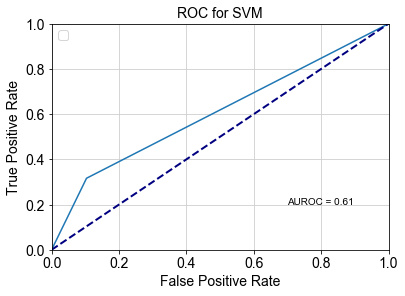

In [45]:
nX_train=X_train
nX_test=X_test
for col in nX_train.columns:
  nX_train[col]=scale(nX_train[col])
for col in nX_test.columns:
  nX_test[col]=scale(nX_test[col])

svm = SVC(gamma='scale', random_state=51).fit(nX_train, Y_train)
ny_test_prob = svm.predict(nX_test)
fpr, tpr, _ = roc_curve(Y_test, ny_test_prob)
auroc = roc_auc_score(Y_test, ny_test_prob)

plt.plot(fpr, tpr)
plt.text(0.7, 0.2, 'AUROC = '+ str(round(auroc, 2)))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for SVM')
plt.legend()

using svm model to classify gender(with 10k+ features)

In [46]:
list1=abs(svm._get_coef())
m1=X_test.append(pd.DataFrame(list1.reshape(1,-1), columns=list(X_test)), ignore_index=True)
m1=m1.sort_values(by=2659,axis=1,key=abs)


In [47]:
svm_20 = m1.iloc[:,-20:]
svm_list_20=svm_20.iloc[2659]
svm_list_20
svm_20_names=svm_20.columns
svm_20_names

Index(['Sphkap', 'Gdf15', 'Fabp4', 'Mgl2', 'Bgn', 'Clec10a', 'Cav1', 'Kcnk9',
       'Sema3c', 'AA467197', 'Ptn', 'Trank1', 'Sox18', 'Car3', 'Igfbp5',
       'Cavin2', 'Cyp26b1', 'Igkc', 'Retnla', 'Igha'],
      dtype='object')

we get top 20 influencial features selected through feature importance of trained svm model

In [48]:
svm_20

,Sphkap,Gdf15,Fabp4,Mgl2,Bgn,Clec10a,Cav1,Kcnk9,Sema3c,AA467197,Ptn,Trank1,Sox18,Car3,Igfbp5,Cavin2,Cyp26b1,Igkc,Retnla,Igha
0,-0.032154,-0.055584,-0.321385,1.623677,-0.106403,3.950724,-0.128649,-0.072102,-0.025184,-0.222656,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,3.631167,-0.116883
1,-0.032154,-0.055584,-0.321385,-0.357511,-0.106403,-0.262951,-0.128649,-0.072102,-0.025184,-0.222656,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,-0.384500,-0.116883
2,-0.032154,-0.055584,-0.321385,2.431396,-0.106403,-0.262951,-0.128649,-0.072102,-0.025184,2.703566,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,-0.384500,-0.116883
3,-0.032154,-0.055584,-0.321385,-0.357511,-0.106403,-0.262951,-0.128649,-0.072102,-0.025184,-0.222656,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,0.472151,-0.384500,-0.116883
4,-0.032154,-0.055584,-0.321385,-0.357511,-0.106403,-0.262951,-0.128649,-0.072102,-0.025184,-0.222656,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,-0.384500,-0.116883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,-0.032154,-0.055584,-0.321385,-0.357511,-0.106403,-0.262951,-0.128649,-0.072102,-0.025184,-0.222656,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,2.245351,-0.384500,-0.116883
2656,-0.032154,-0.055584,-0.321385,-0.357511,-0.106403,-0.262951,-0.128649,-0.072102,-0.025184,-0.222656,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,1.720094,-0.384500,-0.116883
2657,-0.032154,-0.055584,-0.321385,-0.357511,-0.106403,-0.262951,-0.128649,-0.072102,-0.025184,-0.222656,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,-0.384500,-0.116883
2658,-0.032154,-0.055584,-0.321385,-0.357511,-0.106403,-0.262951,-0.128649,-0.072102,-0.025184,-0.222656,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,1.084416,-0.116883


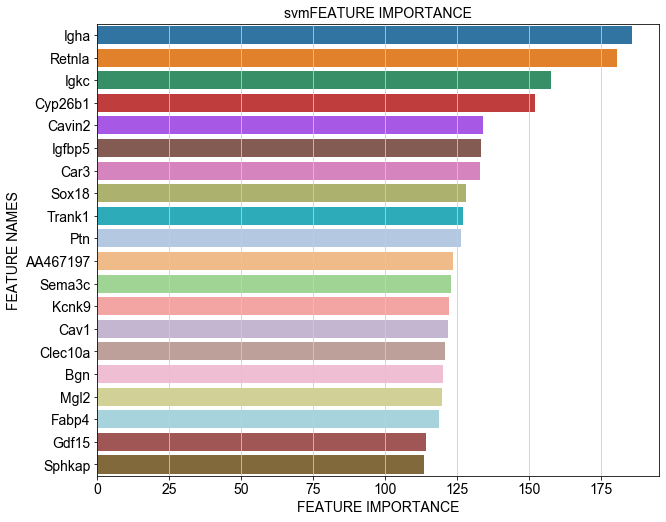

In [49]:
plot_feature_importance(svm_list_20,svm_20_names,'svm')

In [50]:
#import nltk
#from nltk.corpus import stopwords
import pandas as pd
import string
import re
import pickle
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# MODEL 2 :rf

random forest model

In [51]:
X_test

n,Sulf1,Khdc1a,Il1r2,Il1rl1,Ecrg4,Col3a1,Col5a2,Slc40a1,Cavin2,Icos,...,Ms4a1,Ms4a2,Gda,Ifit1,Kif11,Tspan7,Cfp,Bgn,Vsig4,Alas2
Cell_3,-0.042777,-0.165809,-0.096533,-0.231887,-0.06871,-0.034997,-0.037267,-0.283727,-0.131477,-0.240222,...,-0.350020,-0.06716,-0.313544,-0.196477,-0.105862,-0.105776,2.059906,-0.106403,-0.076038,-0.052919
Cell_8,-0.042777,4.584668,-0.096533,-0.231887,-0.06871,-0.034997,-0.037267,-0.283727,-0.131477,-0.240222,...,-0.350020,-0.06716,-0.313544,-0.196477,-0.105862,-0.105776,-0.323613,-0.106403,-0.076038,-0.052919
Cell_10,-0.042777,-0.165809,-0.096533,-0.231887,-0.06871,-0.034997,-0.037267,-0.283727,-0.131477,-0.240222,...,-0.350020,-0.06716,-0.313544,3.904685,-0.105862,-0.105776,2.059906,-0.106403,-0.076038,-0.052919
Cell_11,-0.042777,-0.165809,-0.096533,-0.231887,-0.06871,-0.034997,-0.037267,-0.283727,-0.131477,-0.240222,...,-0.350020,-0.06716,3.107025,-0.196477,-0.105862,-0.105776,-0.323613,-0.106403,-0.076038,-0.052919
Cell_14,-0.042777,-0.165809,-0.096533,-0.231887,-0.06871,-0.034997,-0.037267,-0.283727,-0.131477,-0.240222,...,-0.350020,-0.06716,-0.313544,-0.196477,-0.105862,-0.105776,2.059906,-0.106403,-0.076038,-0.052919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell_6632,-0.042777,-0.165809,-0.096533,-0.231887,-0.06871,-0.034997,-0.037267,-0.283727,14.027353,3.311438,...,-0.350020,-0.06716,-0.313544,-0.196477,-0.105862,7.677848,-0.323613,-0.106403,-0.076038,-0.052919
Cell_6633,-0.042777,-0.165809,-0.096533,-0.231887,-0.06871,-0.034997,-0.037267,-0.283727,-0.131477,-0.240222,...,1.507610,-0.06716,-0.313544,-0.196477,-0.105862,-0.105776,-0.323613,-0.106403,-0.076038,-0.052919
Cell_6634,-0.042777,-0.165809,-0.096533,-0.231887,-0.06871,-0.034997,-0.037267,-0.283727,-0.131477,-0.240222,...,2.264955,-0.06716,-0.313544,-0.196477,-0.105862,-0.105776,-0.323613,-0.106403,-0.076038,-0.052919
Cell_6637,-0.042777,-0.165809,-0.096533,-0.231887,-0.06871,-0.034997,-0.037267,2.301417,-0.131477,-0.240222,...,-0.350020,-0.06716,-0.313544,-0.196477,-0.105862,-0.105776,2.059906,-0.106403,-0.076038,-0.052919


In [52]:
X_train

n,Sulf1,Khdc1a,Il1r2,Il1rl1,Ecrg4,Col3a1,Col5a2,Slc40a1,Cavin2,Icos,...,Ms4a1,Ms4a2,Gda,Ifit1,Kif11,Tspan7,Cfp,Bgn,Vsig4,Alas2
Cell_1678,-0.029802,-0.163992,-0.079129,-0.224259,-0.07695,-0.043513,-0.022397,-0.294167,-0.135767,-0.234724,...,-0.339295,-0.048584,-0.325064,-0.197121,-0.095052,-0.108303,-0.348370,-0.093268,-0.07364,-0.037901
Cell_3705,-0.029802,-0.163992,-0.079129,3.153205,-0.07695,-0.043513,-0.022397,-0.294167,-0.135767,-0.234724,...,-0.339295,-0.048584,-0.325064,-0.197121,-0.095052,-0.108303,-0.348370,-0.093268,-0.07364,-0.037901
Cell_5187,-0.029802,-0.163992,-0.079129,-0.224259,-0.07695,-0.043513,-0.022397,-0.294167,-0.135767,-0.234724,...,-0.339295,-0.048584,-0.325064,-0.197121,-0.095052,-0.108303,-0.348370,-0.093268,-0.07364,-0.037901
Cell_1921,-0.029802,-0.163992,-0.079129,-0.224259,-0.07695,-0.043513,-0.022397,-0.294167,-0.135767,-0.234724,...,3.624122,-0.048584,-0.325064,-0.197121,-0.095052,-0.108303,-0.348370,-0.093268,-0.07364,-0.037901
Cell_1575,-0.029802,-0.163992,-0.079129,-0.224259,-0.07695,-0.043513,-0.022397,-0.294167,-0.135767,-0.234724,...,-0.339295,-0.048584,-0.325064,-0.197121,-0.095052,-0.108303,-0.348370,-0.093268,-0.07364,-0.037901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell_3039,-0.029802,-0.163992,-0.079129,-0.224259,-0.07695,-0.043513,-0.022397,-0.294167,-0.135767,-0.234724,...,-0.339295,-0.048584,-0.325064,-0.197121,-0.095052,-0.108303,-0.348370,-0.093268,-0.07364,-0.037901
Cell_1332,-0.029802,-0.163992,-0.079129,-0.224259,-0.07695,-0.043513,-0.022397,-0.294167,-0.135767,-0.234724,...,-0.339295,-0.048584,-0.325064,-0.197121,-0.095052,-0.108303,1.872537,-0.093268,-0.07364,-0.037901
Cell_690,-0.029802,-0.163992,-0.079129,-0.224259,-0.07695,-0.043513,-0.022397,-0.294167,-0.135767,-0.234724,...,-0.339295,-0.048584,-0.325064,-0.197121,-0.095052,-0.108303,-0.348370,-0.093268,-0.07364,-0.037901
Cell_1700,-0.029802,-0.163992,-0.079129,-0.224259,-0.07695,-0.043513,-0.022397,-0.294167,-0.135767,-0.234724,...,-0.339295,-0.048584,-0.325064,-0.197121,-0.095052,-0.108303,-0.348370,-0.093268,-0.07364,-0.037901


No handles with labels found to put in legend.


0.5613876323111525

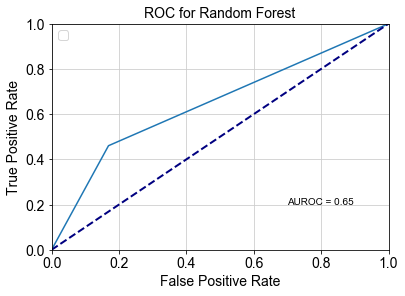

In [53]:
rf = RandomForestClassifier(max_depth=100, random_state=561).fit(X_train, Y_train)
y_test_prob = rf.predict(X_test)
fpr, tpr, _ = roc_curve(Y_test, y_test_prob)
auroc = roc_auc_score(Y_test, y_test_prob)

plt.plot(fpr, tpr)
plt.text(0.7, 0.2, 'AUROC = '+ str(round(auroc, 2)))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for Random Forest')
plt.legend()
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, y_test_prob)
rmse = np.sqrt(mse)
rmse

random forest model trained with 17153 features, acheives accuracy of 0.75(caused by large number of features, the accuracy is improved later after feature selecting)

In [54]:


list2=rf.feature_importances_

m2=X_test.append(pd.DataFrame(list2.reshape(1,-1), columns=list(X_test)), ignore_index=True)
m2=m2.sort_values(by=2659,axis=1)
m2

,Loxl1,Gm9758,Ifi27l2b,Csrp3,Igkv8-24,Lgi2,Fndc1,Gm10354,4930572O03Rik,Prcd,...,Apoc2,Trac,Pf4,Ly6c2,Mgl2,C1qc,Ighm,Igkc,Retnla,Cst3
0,-0.019396,-0.046566,-0.027436,-0.032154,-0.031326,-0.025576,-0.026115,-0.045902,-0.036805,-0.019396,...,-0.305593,-0.425098,1.335488,-0.470589,1.623677,0.962181,0.306115,-0.561606,3.631167,-1.221595
1,-0.019396,-0.046566,-0.027436,-0.032154,-0.031326,-0.025576,-0.026115,-0.045902,-0.036805,-0.019396,...,-0.305593,-0.425098,-0.402497,-0.470589,-0.357511,-0.660645,0.800808,-0.561606,-0.384500,0.115395
2,-0.019396,-0.046566,-0.027436,-0.032154,-0.031326,-0.025576,-0.026115,-0.045902,-0.036805,-0.019396,...,-0.305593,-0.425098,-0.402497,-0.470589,2.431396,2.118195,0.306115,-0.561606,-0.384500,1.555601
3,-0.019396,-0.046566,-0.027436,-0.032154,-0.031326,-0.025576,-0.026115,-0.045902,-0.036805,-0.019396,...,6.018856,-0.425098,-0.402497,1.924509,-0.357511,-0.660645,-0.907278,0.472151,-0.384500,1.030134
4,-0.019396,-0.046566,-0.027436,-0.032154,-0.031326,-0.025576,-0.026115,-0.045902,-0.036805,-0.019396,...,-0.305593,-0.425098,-0.402497,-0.470589,-0.357511,0.722481,0.306115,-0.561606,-0.384500,0.807037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,-0.019396,-0.046566,-0.027436,-0.032154,-0.031326,-0.025576,-0.026115,-0.045902,-0.036805,-0.019396,...,-0.305593,-0.425098,-0.402497,-0.470589,-0.357511,-0.660645,1.458432,2.245351,-0.384500,-0.271822
2656,-0.019396,-0.046566,-0.027436,-0.032154,-0.031326,-0.025576,-0.026115,-0.045902,-0.036805,-0.019396,...,-0.305593,-0.425098,-0.402497,-0.470589,-0.357511,-0.660645,1.302809,1.720094,-0.384500,-0.271822
2657,-0.019396,-0.046566,-0.027436,-0.032154,-0.031326,-0.025576,-0.026115,-0.045902,-0.036805,-0.019396,...,2.314385,-0.425098,3.540578,-0.470589,-0.357511,2.042670,0.306115,-0.561606,-0.384500,1.477421
2658,-0.019396,-0.046566,-0.027436,-0.032154,-0.031326,-0.025576,-0.026115,-0.045902,-0.036805,-0.019396,...,-0.305593,-0.425098,-0.402497,-0.470589,-0.357511,-0.660645,0.800808,-0.561606,1.084416,-0.271822


In [55]:
list2
RF_important_indices = (np.argsort(rf.feature_importances_)[::-1])[:20]
RF_important_indices

array([ 63, 453, 177, 367, 115, 326, 430, 137, 409, 206, 444, 247, 193,
       338, 428,  37, 322, 360, 415, 401])

In [56]:
rf_20 = m2.iloc[:,-20:]
rf_list_20=rf_20.iloc[2659]
rf_list_20
rf_20_names=rf_20.columns
rf_20_names

Index(['Stab1', 'Gzmb', 'Serpina3g', 'Tcf7', 'Mrc1', 'Ly6d', 'Ccl4', 'Klrc1',
       'Lpl', 'Iglc2', 'Apoc2', 'Trac', 'Pf4', 'Ly6c2', 'Mgl2', 'C1qc', 'Ighm',
       'Igkc', 'Retnla', 'Cst3'],
      dtype='object')

top 20 influential genes we get from random forest model

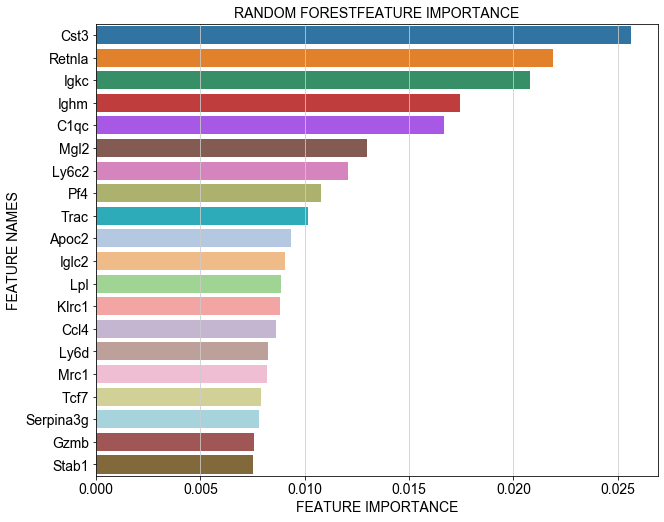

In [57]:
plot_feature_importance(rf_list_20,rf_20_names,'RANDOM FOREST')

# 4 model combination plot

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)
clf.predict_proba(X_test)
clf.predict(X_test)
clf.score(X_test, Y_test)


0.6476118841669801

In [59]:
clf.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

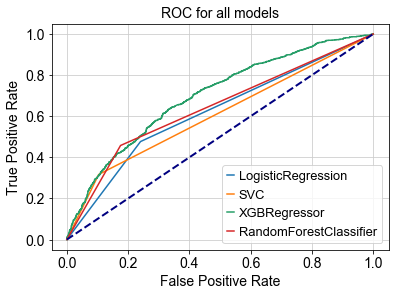

In [60]:
models = [LogisticRegression(max_iter=1000, random_state=551),SVC(gamma='scale', random_state=551),XGBRegressor(random_state=551),RandomForestClassifier(max_depth=100, random_state=551)]

perf = {}

model_names = []

auroc_val = []
fit=[None]*6
i=0
for model in models:
    fit[i] = model.fit(X_train, Y_train)
    y_test_prob = fit[i].predict(X_test)
    fpr, tpr, _ = roc_curve(Y_test, y_test_prob)
    auroc = roc_auc_score(Y_test, y_test_prob)
    perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    auroc_val.append(auroc)
    i=i+1


plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
    model_names.append(model_name)


plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()

overall accuracy visualization implemented with 17153 genes
we observe that xgbregressor scheives best accuracy of 97%

[0 1 2 3]
[0.6181358762263972, 0.6063825944851352, 0.6981854946148063, 0.6412116834133661]
['LogisticRegression', 'SVC', 'XGBRegressor', 'RandomForestClassifier']


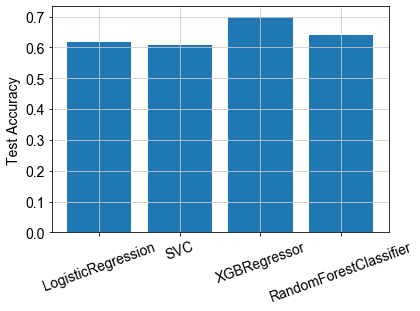

In [61]:

pos = np.arange(len(model_names))
print(pos)
print(auroc_val)
print(model_names)
plt.bar(pos, auroc_val)
plt.ylabel('Test Accuracy')
plt.xticks(pos, model_names)
plt.xticks(rotation = 20)
plt.show()

# MODEL 3:xgb

In [62]:
list3=abs(fit[2].feature_importances_)
m3=X_test.append(pd.DataFrame(list1.reshape(1,-1), columns=list(X_test)), ignore_index=True)
m3=m3.sort_values(by=2659,axis=1,key=abs)


In [63]:
m3

,Igkv8-24,Csrp3,Stmn2,Ccn2,Stfa2l1,Car4,Sox5,Ltc4s,Mki67,Ptgis,...,Ptn,Trank1,Sox18,Car3,Igfbp5,Cavin2,Cyp26b1,Igkc,Retnla,Igha
0,-0.031326,-0.032154,-3.651025e-02,-0.045609,-0.068670,-0.059398,-0.111309,-0.219006,-0.129463,-0.057436,...,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,3.631167,-0.116883
1,-0.031326,-0.032154,-3.651025e-02,-0.045609,-0.068670,-0.059398,-0.111309,-0.219006,-0.129463,-0.057436,...,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,-0.384500,-0.116883
2,-0.031326,-0.032154,-3.651025e-02,-0.045609,-0.068670,-0.059398,-0.111309,-0.219006,-0.129463,-0.057436,...,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,-0.384500,-0.116883
3,-0.031326,-0.032154,-3.651025e-02,-0.045609,-0.068670,-0.059398,-0.111309,-0.219006,-0.129463,-0.057436,...,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,0.472151,-0.384500,-0.116883
4,-0.031326,-0.032154,-3.651025e-02,-0.045609,-0.068670,-0.059398,-0.111309,-0.219006,-0.129463,-0.057436,...,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,-0.384500,-0.116883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,-0.031326,-0.032154,-3.651025e-02,-0.045609,-0.068670,-0.059398,-0.111309,-0.219006,-0.129463,-0.057436,...,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,2.245351,-0.384500,-0.116883
2656,-0.031326,-0.032154,-3.651025e-02,-0.045609,-0.068670,-0.059398,-0.111309,-0.219006,-0.129463,-0.057436,...,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,1.720094,-0.384500,-0.116883
2657,-0.031326,-0.032154,-3.651025e-02,-0.045609,-0.068670,-0.059398,-0.111309,-0.219006,-0.129463,-0.057436,...,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,-0.384500,-0.116883
2658,-0.031326,-0.032154,-3.651025e-02,-0.045609,-0.068670,-0.059398,-0.111309,-0.219006,-0.129463,-0.057436,...,-0.070781,-0.069278,-0.118819,-0.155230,-0.110862,-0.131477,-0.052419,-0.561606,1.084416,-0.116883


In [64]:
xgb_20 = m3.iloc[:,-20:]
xgb_list_20=rf_20.iloc[2659]
xgb_list_20
xgb_20_names=xgb_20.columns
xgb_20_names

Index(['Sphkap', 'Gdf15', 'Fabp4', 'Mgl2', 'Bgn', 'Clec10a', 'Cav1', 'Kcnk9',
       'Sema3c', 'AA467197', 'Ptn', 'Trank1', 'Sox18', 'Car3', 'Igfbp5',
       'Cavin2', 'Cyp26b1', 'Igkc', 'Retnla', 'Igha'],
      dtype='object')

xgboost regressor feature selection condected on 17153 genes
following plot shows importance ranking top 20

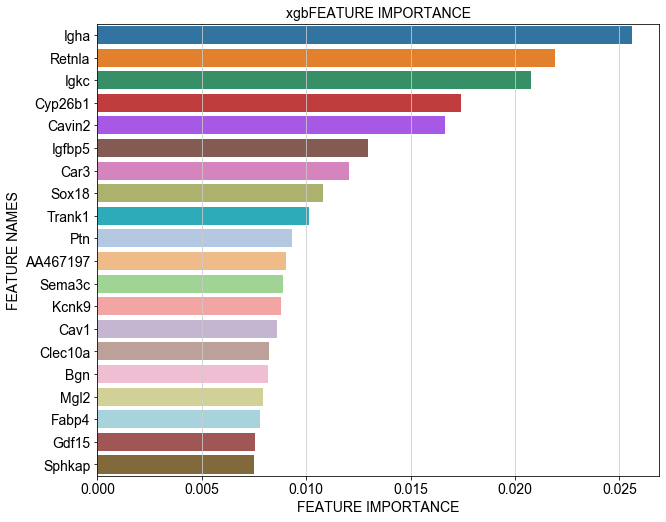

In [65]:
plot_feature_importance(xgb_list_20,xgb_20_names,'xgb')

# MODEL 4:logistic

In [66]:
list4=abs(fit[0].coef_)
m4=X_test.append(pd.DataFrame(list1.reshape(1,-1), columns=list(X_test)), ignore_index=True)
m4=m4.sort_values(by=2659,axis=1,key=abs)


In [67]:
lgi_20 = m4.iloc[:,-20:]
lgi_list_20=lgi_20.iloc[2659]
lgi_list_20
lgi_20_names=lgi_20.columns
lgi_20_names

Index(['Sphkap', 'Gdf15', 'Fabp4', 'Mgl2', 'Bgn', 'Clec10a', 'Cav1', 'Kcnk9',
       'Sema3c', 'AA467197', 'Ptn', 'Trank1', 'Sox18', 'Car3', 'Igfbp5',
       'Cavin2', 'Cyp26b1', 'Igkc', 'Retnla', 'Igha'],
      dtype='object')

logistic regression feature selection condected on 17153 genes
following plot shows importance ranking top 20

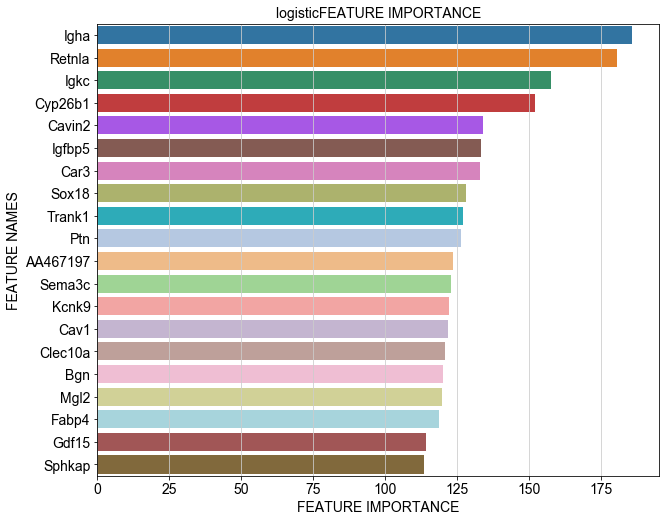

In [68]:
plot_feature_importance(lgi_list_20,lgi_20_names,'logistic')

#feature wrap up

The following 4 lists are 4 list of top 20 important genes we selected from logistic regression model,random forest model, svm model and xg boost regressor model.We cross compare and notice that in all 4 lists, majority of the lists overlap. All genes are selected at least 3 times during 4 times of different model feature selection,and 12 of the genes appears in every top-20-important list hence they are considered significantly important with respect to our model fitting. We collect the 12 genes and make a table of thir gene names and their chromosome.
Apparently the accuracy of some model (randomforest and svm are not ideal deal to our high dementional feature),so we now use data(2659 rows × 12 genes)  sliced with the selected 12 genes to fit these 4 model and check the accuracy. If the accuracy are all considerable, it proves that the 12 genes we selected are indeed important.

In [69]:
lgi_20_names

Index(['Sphkap', 'Gdf15', 'Fabp4', 'Mgl2', 'Bgn', 'Clec10a', 'Cav1', 'Kcnk9',
       'Sema3c', 'AA467197', 'Ptn', 'Trank1', 'Sox18', 'Car3', 'Igfbp5',
       'Cavin2', 'Cyp26b1', 'Igkc', 'Retnla', 'Igha'],
      dtype='object')

In [70]:
rf_20_names

Index(['Stab1', 'Gzmb', 'Serpina3g', 'Tcf7', 'Mrc1', 'Ly6d', 'Ccl4', 'Klrc1',
       'Lpl', 'Iglc2', 'Apoc2', 'Trac', 'Pf4', 'Ly6c2', 'Mgl2', 'C1qc', 'Ighm',
       'Igkc', 'Retnla', 'Cst3'],
      dtype='object')

In [71]:
svm_20_names

Index(['Sphkap', 'Gdf15', 'Fabp4', 'Mgl2', 'Bgn', 'Clec10a', 'Cav1', 'Kcnk9',
       'Sema3c', 'AA467197', 'Ptn', 'Trank1', 'Sox18', 'Car3', 'Igfbp5',
       'Cavin2', 'Cyp26b1', 'Igkc', 'Retnla', 'Igha'],
      dtype='object')

In [72]:
xgb_20_names

Index(['Sphkap', 'Gdf15', 'Fabp4', 'Mgl2', 'Bgn', 'Clec10a', 'Cav1', 'Kcnk9',
       'Sema3c', 'AA467197', 'Ptn', 'Trank1', 'Sox18', 'Car3', 'Igfbp5',
       'Cavin2', 'Cyp26b1', 'Igkc', 'Retnla', 'Igha'],
      dtype='object')

following code concat 4 list and shows how many times each gene occurs in 4 lists

In [73]:
listtt=[*xgb_20_names,*lgi_20_names,*svm_20_names,*rf_20_names]


In [74]:
listtt

['Sphkap',
 'Gdf15',
 'Fabp4',
 'Mgl2',
 'Bgn',
 'Clec10a',
 'Cav1',
 'Kcnk9',
 'Sema3c',
 'AA467197',
 'Ptn',
 'Trank1',
 'Sox18',
 'Car3',
 'Igfbp5',
 'Cavin2',
 'Cyp26b1',
 'Igkc',
 'Retnla',
 'Igha',
 'Sphkap',
 'Gdf15',
 'Fabp4',
 'Mgl2',
 'Bgn',
 'Clec10a',
 'Cav1',
 'Kcnk9',
 'Sema3c',
 'AA467197',
 'Ptn',
 'Trank1',
 'Sox18',
 'Car3',
 'Igfbp5',
 'Cavin2',
 'Cyp26b1',
 'Igkc',
 'Retnla',
 'Igha',
 'Sphkap',
 'Gdf15',
 'Fabp4',
 'Mgl2',
 'Bgn',
 'Clec10a',
 'Cav1',
 'Kcnk9',
 'Sema3c',
 'AA467197',
 'Ptn',
 'Trank1',
 'Sox18',
 'Car3',
 'Igfbp5',
 'Cavin2',
 'Cyp26b1',
 'Igkc',
 'Retnla',
 'Igha',
 'Stab1',
 'Gzmb',
 'Serpina3g',
 'Tcf7',
 'Mrc1',
 'Ly6d',
 'Ccl4',
 'Klrc1',
 'Lpl',
 'Iglc2',
 'Apoc2',
 'Trac',
 'Pf4',
 'Ly6c2',
 'Mgl2',
 'C1qc',
 'Ighm',
 'Igkc',
 'Retnla',
 'Cst3']

In [75]:
from collections import Counter
b=dict(Counter(listtt))
ttl=archive=({key for key,value in b.items()if value>1})
archive=({key:value for key,value in b.items()if value>1})

In [76]:
ttl

{'AA467197',
 'Bgn',
 'Car3',
 'Cav1',
 'Cavin2',
 'Clec10a',
 'Cyp26b1',
 'Fabp4',
 'Gdf15',
 'Igfbp5',
 'Igha',
 'Igkc',
 'Kcnk9',
 'Mgl2',
 'Ptn',
 'Retnla',
 'Sema3c',
 'Sox18',
 'Sphkap',
 'Trank1'}

archive shows how many times a gene is selected as top 20 influencing feature

In [77]:
archive

{'Sphkap': 3,
 'Gdf15': 3,
 'Fabp4': 3,
 'Mgl2': 4,
 'Bgn': 3,
 'Clec10a': 3,
 'Cav1': 3,
 'Kcnk9': 3,
 'Sema3c': 3,
 'AA467197': 3,
 'Ptn': 3,
 'Trank1': 3,
 'Sox18': 3,
 'Car3': 3,
 'Igfbp5': 3,
 'Cavin2': 3,
 'Cyp26b1': 3,
 'Igkc': 4,
 'Retnla': 4,
 'Igha': 3}

the following is a list of 12 genes that are evaluated as top 20 important features by all 4 models

In [78]:
col_select=['Rpl35','Rps27rt', 'Rpl9-ps6','Rps27','Uba52','Lars2','Gm42418','Uty',  'Kdm5d','Eif2s3y', 'Ddx3y','Xist']

In [79]:
place=[ "Chromosome 2"  ,"Chromosome 9","Chromosome 19 ","Chromosome 3", "Chromosome 8 ",
       " Chromosome 9", "Chromosome 17","Chromosome Y","Chromosome Y","Chromosome Y"," Chromosome Y","Chromosome X" ]

In [80]:
import pandas as pd
dfff = pd.DataFrame(col_select, columns = ['gene'])
dfff["chromosome"]=place

genes and their chromosome

In [81]:
dfff

,gene,chromosome
0,Rpl35,Chromosome 2
1,Rps27rt,Chromosome 9
2,Rpl9-ps6,Chromosome 19
3,Rps27,Chromosome 3
4,Uba52,Chromosome 8
5,Lars2,Chromosome 9
6,Gm42418,Chromosome 17
7,Uty,Chromosome Y
8,Kdm5d,Chromosome Y
9,Eif2s3y,Chromosome Y


the following is the dataset we will use with only 12 features(the 12 gene we selected before)

run random forest model again, we see the accuracy is significantly better, reaching 90%

In [82]:
ffrc=rc.loc[:, col_select]
ffrc["y"] = pd.Categorical(joined_list)
reboot_training_data = ffrc.sample(frac=0.6, random_state=25)
reboot_testing_data = ffrc.drop(reboot_training_data.index)

rbY_train=reboot_training_data["y"]
rbX_train=reboot_training_data.drop(["y"],axis=1)
rbY_test=reboot_testing_data["y"]
rbX_test=reboot_testing_data.drop(["y"],axis=1)


KeyError: "None of [Index(['Rpl35', 'Rps27rt', 'Rpl9-ps6', 'Rps27', 'Uba52', 'Lars2', 'Gm42418',\n       'Uty', 'Kdm5d', 'Eif2s3y', 'Ddx3y', 'Xist'],\n      dtype='object', name='n')] are in the [columns]"

No handles with labels found to put in legend.


0.3268135100132653

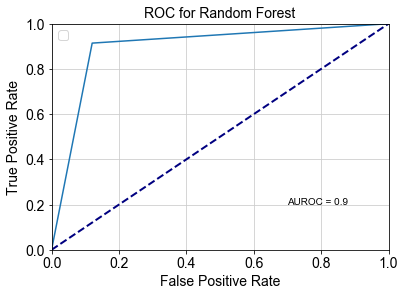

In [ ]:
rbrf = RandomForestClassifier(max_depth=100, random_state=561).fit(rbX_train, rbY_train)
rby_test_prob = rbrf.predict(rbX_test)
fpr, tpr, _ = roc_curve(rbY_test, rby_test_prob)
auroc = roc_auc_score(rbY_test, rby_test_prob)

plt.plot(fpr, tpr)
plt.text(0.7, 0.2, 'AUROC = '+ str(round(auroc, 2)))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for Random Forest')
plt.legend()
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(rbY_test, rby_test_prob)
rmse = np.sqrt(mse)
rmse

the following auroc curve is the accuracy plot we have using previous 4 models, but this time we fit models with only the 12 genes we selected( most important ones)

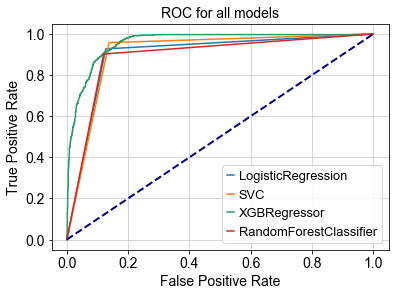

In [ ]:
models = [LogisticRegression(max_iter=1000, random_state=551),SVC(gamma='scale', random_state=551),XGBRegressor(random_state=551),RandomForestClassifier(max_depth=100, random_state=551)]

perf = {}

model_names = []

auroc_val = []
fit=[None]*6
i=0
for model in models:
    fit[i] = model.fit(rbX_train, rbY_train)
    y_test_prob = fit[i].predict(rbX_test)
    fpr, tpr, _ = roc_curve(rbY_test, y_test_prob)
    auroc = roc_auc_score(rbY_test, y_test_prob)
    perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    auroc_val.append(auroc)
    i=i+1


plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
    model_names.append(model_name)


plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()

here we can see the classification accuracy of each model trained and tested with data of 12 selected genes is around or above 90%
proves that theses 12 genes are important, we can accurately predict gender with these 12 genes.

[0 1 2 3]
[0.9004209865651404, 0.910083545997667, 0.9584194352503715, 0.8914443806286969]
['LogisticRegression', 'SVC', 'XGBRegressor', 'RandomForestClassifier']


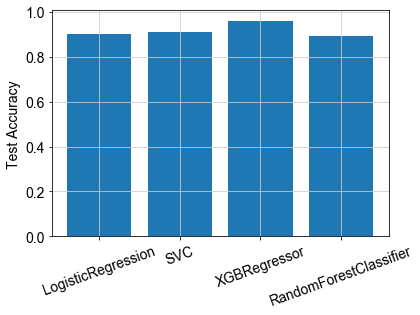

In [ ]:

pos = np.arange(len(model_names))
print(pos)
print(auroc_val)
print(model_names)
plt.bar(pos, auroc_val)
plt.ylabel('Test Accuracy')
plt.xticks(pos, model_names)
plt.xticks(rotation = 20)
plt.show()

In [ ]:
rbY_train

Cell_1678    1.0
Cell_3705    0.0
Cell_5187    0.0
Cell_1921    1.0
Cell_1575    1.0
            ... 
Cell_3039    0.0
Cell_1332    1.0
Cell_690     1.0
Cell_1700    1.0
Cell_299     1.0
Name: y, Length: 3989, dtype: category
Categories (2, float64): [0.0, 1.0]

In [ ]:
rbX_train 

n,Rpl35,Rps27rt,Rpl9-ps6,Rps27,Uba52,Lars2,Gm42418,Uty,Kdm5d,Eif2s3y,Ddx3y,Xist
Cell_1678,0.741276,0.526589,0.000000,0.000000,0.741276,0.526589,1.291725,0.0,0.0,0.000000,0.000000,0.000000
Cell_3705,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.124748,0.0,0.0,0.000000,0.000000,1.026672
Cell_5187,1.080418,0.869742,0.741276,0.526589,0.526589,0.000000,1.474144,0.0,0.0,0.000000,0.000000,1.223156
Cell_1921,1.080418,0.526589,0.741276,0.741276,0.741276,0.526589,1.385227,0.0,0.0,0.000000,0.526589,0.000000
Cell_1575,1.291725,1.358505,1.080418,0.741276,1.026672,0.741276,1.503301,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Cell_3039,1.026672,0.741276,0.000000,0.741276,0.000000,0.000000,1.194705,0.0,0.0,0.000000,0.000000,0.869742
Cell_1332,0.869742,0.526589,0.526589,0.000000,0.000000,1.162283,1.595709,0.0,0.0,0.000000,0.000000,0.000000
Cell_690,0.000000,0.526589,0.526589,0.526589,0.000000,0.526589,1.516302,0.0,0.0,0.000000,0.526589,0.000000
Cell_1700,0.526589,0.000000,0.000000,0.000000,0.000000,0.000000,1.343703,0.0,0.0,0.526589,0.000000,0.000000


In [ ]:
rbY_test

Cell_3       1.0
Cell_8       1.0
Cell_10      1.0
Cell_11      1.0
Cell_14      1.0
            ... 
Cell_6632    0.0
Cell_6633    0.0
Cell_6634    0.0
Cell_6637    0.0
Cell_6641    0.0
Name: y, Length: 2659, dtype: category
Categories (2, float64): [0.0, 1.0]

['Fkbp5',
 'Rnaset2a',
 'Gm20594',
 'Rpl35',
 'Rps27rt',
 'AY036118',
 'Adh1',
 'Rpl9-ps6',
 'Rpl36a-ps1',
 'Rps27',
 'Uba52',
 'Wdr89',
 'Lars2',
 'Tsix',
 'Gm42418',
 'Uty',
 'Kdm5d',
 'Eif2s3y',
 'Ddx3y',
 'Xist',
 'Fkbp5',
 'Rnaset2a',
 'Gm20594',
 'Rpl35',
 'Rps27rt',
 'AY036118',
 'Adh1',
 'Rpl9-ps6',
 'Rpl36a-ps1',
 'Rps27',
 'Uba52',
 'Wdr89',
 'Lars2',
 'Tsix',
 'Gm42418',
 'Uty',
 'Kdm5d',
 'Eif2s3y',
 'Ddx3y',
 'Xist',
 'Fkbp5',
 'Rnaset2a',
 'Gm20594',
 'Rpl35',
 'Rps27rt',
 'AY036118',
 'Adh1',
 'Rpl9-ps6',
 'Rpl36a-ps1',
 'Rps27',
 'Uba52',
 'Wdr89',
 'Lars2',
 'Tsix',
 'Gm42418',
 'Uty',
 'Kdm5d',
 'Eif2s3y',
 'Ddx3y',
 'Xist',
 'Rpl35a',
 'mt-Co2',
 'Cd74',
 'H2-Eb1',
 'mt-Co3',
 'H2-Ab1',
 'Rpl9-ps6',
 'mt-Cytb',
 'Retnla',
 'Uty',
 'Uba52',
 'Rps27',
 'Kdm5d',
 'Lars2',
 'Rpl35',
 'Rps27rt',
 'Eif2s3y',
 'Gm42418',
 'Ddx3y',
 'Xist']

# data


In [ ]:
realmat = sc.read_mtx('matrix.mtx')
realfeature=pd.read_csv('features.tsv',sep='\t',header=None)
realmat=realmat[0:32285]
realtag=pd.read_csv('tag.csv')
actt=realfeature.loc[realfeature[2] == 'Gene Expression']
celltag=pd.read_csv('barcodes.tsv',sep='\t',header=None)

In [ ]:
adata = anndata.AnnData(X=realmat.X.T)
lol = list(celltag[0])  # or pd.Series(actt[1])
adata.obs['cell'] = lol


lmao = list(actt[1])  # or pd.Series(actt[1])
adata.var['gene_ids'] = lmao
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
adata
adata.var['mt'] =  adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var
# Remove headers and set the index to 'gene_ids'
adata.var.index = adata.var['gene_ids'].values
adata.var.index.name = None  # This removes the header (name) of the index
adata.obs

#adata.var.index = actt[1].astype('string')


scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.8.1 pandas==1.2.4 scikit-learn==1.1.1 statsmodels==0.14.0rc0 python-igraph==0.10.4 pynndescent==0.5.10
filtered out 3 cells that have less than 100 genes expressed
filtered out 19261 genes that are detected in less than 3 cells


,cell,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
0,AAACCCAAGACAGCTG-1,1867,1853,9048.0,0.0,0.0
1,AAACCCACAAAGACGC-1,923,922,1715.0,0.0,0.0
2,AAACGAAAGCACTCGC-1,458,458,799.0,0.0,0.0
3,AAACGAACAAATGGTA-1,692,692,1159.0,0.0,0.0
4,AAAGGATGTGTGTTTG-1,285,284,833.0,0.0,0.0
...,...,...,...,...,...,...
1647,TTTGGTTCAGTGGCTC-1,971,969,1845.0,0.0,0.0
1648,TTTGGTTGTAACGTTC-1,753,751,1347.0,0.0,0.0
1649,TTTGGTTTCAGCGTCG-1,983,983,2058.0,0.0,0.0
1650,TTTGTTGGTACGTTCA-1,650,647,1444.0,0.0,0.0


normalizing counts per cell
    finished (0:00:00)


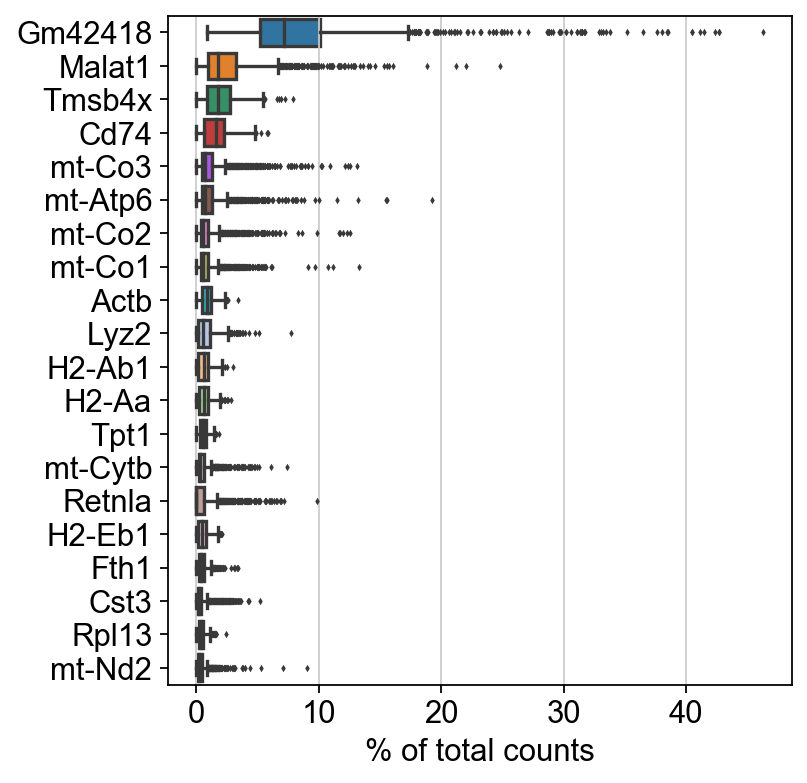

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [ ]:
adata.var_names_make_unique()  # this is unnecessary if us

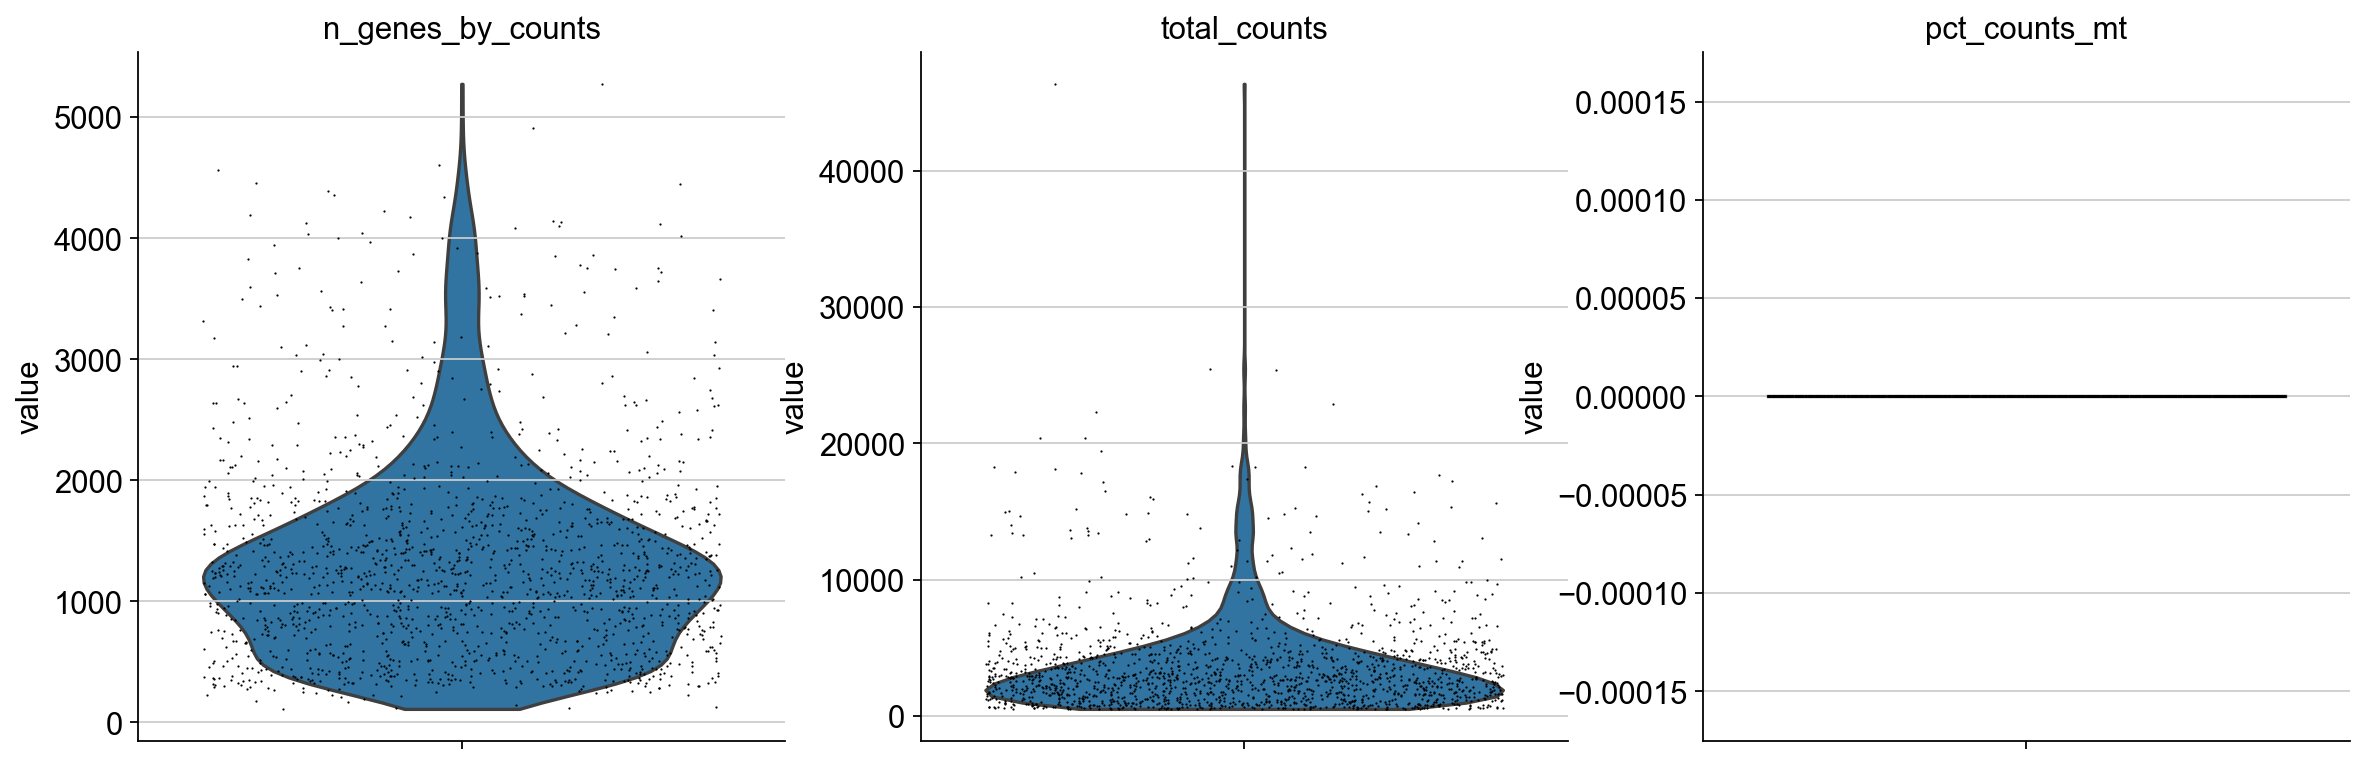

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

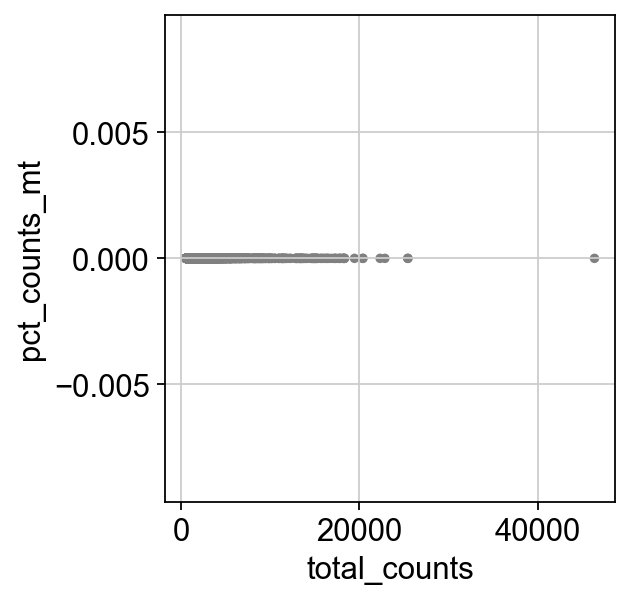

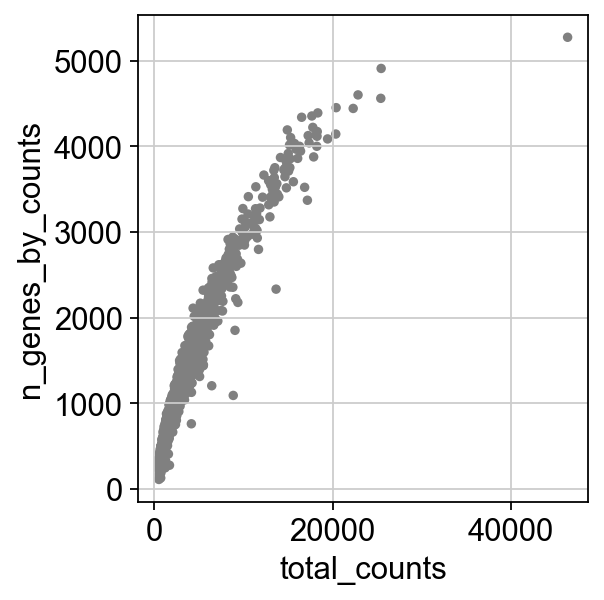

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [ ]:
adata

View of AnnData object with n_obs × n_vars = 1519 × 13024
    obs: 'cell', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


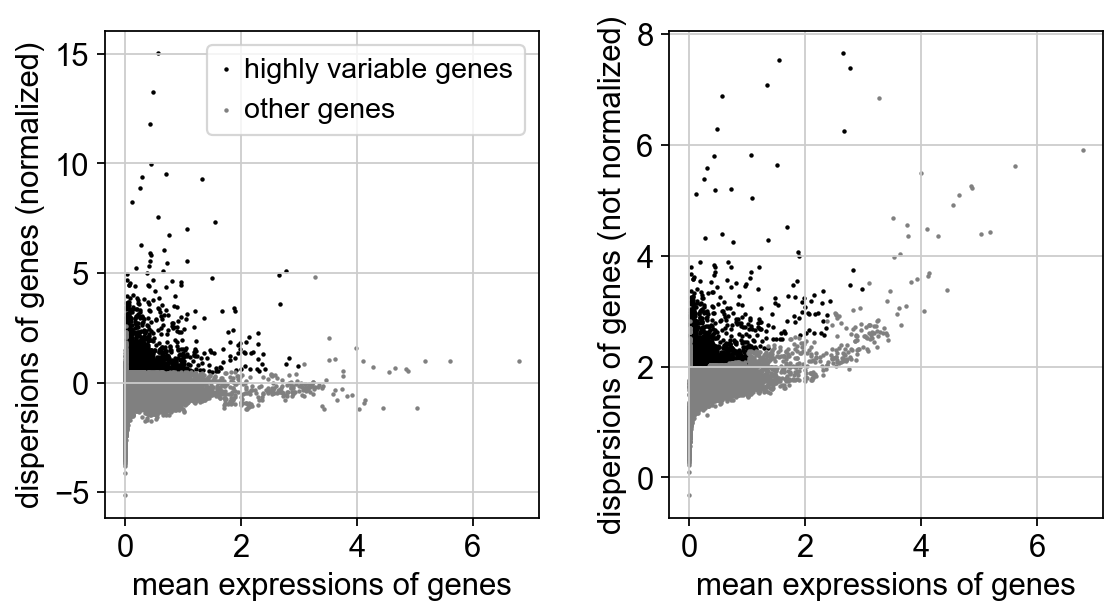

In [ ]:
sc.pp.log1p(adata)
# sc.pp.log1p(maledata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# Compute highly variable genes

sc.pl.highly_variable_genes(adata)

In [ ]:
adata

AnnData object with n_obs × n_vars = 1519 × 13024
    obs: 'cell', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
adata.X

<1519x13024 sparse matrix of type '<class 'numpy.float32'>'
	with 1724097 stored elements in Compressed Sparse Column format>

In [ ]:
METT=adata.X
dense_matrix = METT.toarray()

#METT = METT[~METT['cell'].isin(realtag['cell_barcode'])
# Convert the dense NumPy array to a Pandas DataFrame
METT = pd.DataFrame(dense_matrix,columns=adata.var_names, index=adata.obs['cell'].values)


In [ ]:
METT['cell']=adata.obs['cell'].values

In [ ]:
realtag

,cell_barcode,num_features,feature_call,num_umis
0,AAACCCAAGACAGCTG-1,1,CMO305,5518
1,AAACCCACAAAGACGC-1,1,CMO305,14659
2,AAACGAAAGCACTCGC-1,1,CMO305,27237
3,AAACGAACAAATGGTA-1,1,CMO305,6338
4,AAAGGATGTGTGTTTG-1,1,CMO305,15139
...,...,...,...,...
1647,TTTAGTCTCTCGTGGG-1,1,CMO306,22086
1648,TTTCAGTGTTCAAAGA-1,1,CMO306,11295
1649,TTTGACTTCTTGGGCG-1,1,CMO306,8552
1650,TTTGGTTCAGTGGCTC-1,1,CMO306,4678


In [ ]:
realtag['cell_barcode']

0       AAACCCAAGACAGCTG-1
1       AAACCCACAAAGACGC-1
2       AAACGAAAGCACTCGC-1
3       AAACGAACAAATGGTA-1
4       AAAGGATGTGTGTTTG-1
               ...        
1647    TTTAGTCTCTCGTGGG-1
1648    TTTCAGTGTTCAAAGA-1
1649    TTTGACTTCTTGGGCG-1
1650    TTTGGTTCAGTGGCTC-1
1651    TTTGGTTGTAACGTTC-1
Name: cell_barcode, Length: 1652, dtype: object

In [ ]:
realtag.index=realtag['cell_barcode'].values
result = METT.join(realtag[['feature_call']], how='left')
print(METT.index.isin(realtag.index).sum())
result
# Remove rows where 'gender' is NaN
result = result.dropna(subset=['feature_call'])

print(result)

1519
                    Mrpl15  Lypla1     Tcea1  Atp6v1h    Rb1cc1  \
AAACCCAAGACAGCTG-1     0.0     0.0  0.000000      0.0  0.000000   
AAACCCACAAAGACGC-1     0.0     0.0  0.000000      0.0  1.921457   
AAACGAAAGCACTCGC-1     0.0     0.0  0.000000      0.0  0.000000   
AAACGAACAAATGGTA-1     0.0     0.0  0.000000      0.0  0.000000   
AAAGGATGTGTGTTTG-1     0.0     0.0  0.000000      0.0  2.565319   
...                    ...     ...       ...      ...       ...   
TTTGGTTCAGTGGCTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTGTAACGTTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTTCAGCGTCG-1     0.0     0.0  1.767994      0.0  0.000000   
TTTGTTGGTACGTTCA-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGTTGGTCCACTCT-1     0.0     0.0  1.086885      0.0  0.000000   

                    4732440D04Rik    Pcmtd1  Gm26901      Rrs1  2610203C22Rik  \
AAACCCAAGACAGCTG-1            0.0  0.744418      0.0  0.000000            0.0   
AAACCCACAAAGACGC-1          

In [ ]:
# Initialize the 'gender' column with NaN or some default value
result['gender'] = None

# Update 'gender' based on 'feature_call'
result.loc[result['feature_call'] == 'CMO305', 'gender'] = 1
result.loc[result['feature_call'] == 'CMO306', 'gender'] = 0

print(result)

                    Mrpl15  Lypla1     Tcea1  Atp6v1h    Rb1cc1  \
AAACCCAAGACAGCTG-1     0.0     0.0  0.000000      0.0  0.000000   
AAACCCACAAAGACGC-1     0.0     0.0  0.000000      0.0  1.921457   
AAACGAAAGCACTCGC-1     0.0     0.0  0.000000      0.0  0.000000   
AAACGAACAAATGGTA-1     0.0     0.0  0.000000      0.0  0.000000   
AAAGGATGTGTGTTTG-1     0.0     0.0  0.000000      0.0  2.565319   
...                    ...     ...       ...      ...       ...   
TTTGGTTCAGTGGCTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTGTAACGTTC-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGGTTTCAGCGTCG-1     0.0     0.0  1.767994      0.0  0.000000   
TTTGTTGGTACGTTCA-1     0.0     0.0  0.000000      0.0  0.000000   
TTTGTTGGTCCACTCT-1     0.0     0.0  1.086885      0.0  0.000000   

                    4732440D04Rik    Pcmtd1  Gm26901      Rrs1  2610203C22Rik  \
AAACCCAAGACAGCTG-1            0.0  0.744418      0.0  0.000000            0.0   
AAACCCACAAAGACGC-1            0.0

Index(['Mrpl15', 'Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', '4732440D04Rik',
       'Pcmtd1', 'Gm26901', 'Rrs1', '2610203C22Rik',
       ...
       'AC125149.3', 'AC168977.1', 'CAAA01118383.1', 'Csprs', 'Vamp7',
       'CAAA01147332.1', 'AC149090.1', 'cell', 'feature_call', 'gender'],
      dtype='object', length=13027)

In [ ]:
intersection = list(set(result.columns) & set(nX_train.columns))


In [ ]:
len(intersection)

331

In [ ]:
columns_to_extract = intersection

# columns_to_extract={'AY036118',

#  'Ddx3y',
#  'Eif2s3y',
#  'Fkbp5',

#  'Gm42418',
#  'Kdm5d',
#  'Lars2',
#  'Rnaset2a',
#  'Rpl35',
#  'Rpl36a-ps1',
#  'Rpl9-ps6',
#  'Rps27',
#  'Rps27rt',
#  'Tsix',
#  'Uba52',
#  'Uty',
#  'Wdr89',
#  'Xist'}
# # Extract the relevant columns
extracted_df = result[columns_to_extract]

print(extracted_df)

                      Zcwpw1  Gdf3     Cd163  Mcpt4   Hp  Clec4g  Clec3b  \
AAACCCAAGACAGCTG-1  0.000000   0.0  0.000000    0.0  0.0     0.0     0.0   
AAACCCACAAAGACGC-1  0.000000   0.0  0.000000    0.0  0.0     0.0     0.0   
AAACGAAAGCACTCGC-1  0.000000   0.0  0.000000    0.0  0.0     0.0     0.0   
AAACGAACAAATGGTA-1  0.000000   0.0  0.000000    0.0  0.0     0.0     0.0   
AAAGGATGTGTGTTTG-1  0.000000   0.0  0.000000    0.0  0.0     0.0     0.0   
...                      ...   ...       ...    ...  ...     ...     ...   
TTTGGTTCAGTGGCTC-1  0.000000   0.0  2.471493    0.0  0.0     0.0     0.0   
TTTGGTTGTAACGTTC-1  0.000000   0.0  3.147239    0.0  0.0     0.0     0.0   
TTTGGTTTCAGCGTCG-1  0.000000   0.0  0.000000    0.0  0.0     0.0     0.0   
TTTGTTGGTACGTTCA-1  0.000000   0.0  0.000000    0.0  0.0     0.0     0.0   
TTTGTTGGTCCACTCT-1  1.086885   0.0  0.000000    0.0  0.0     0.0     0.0   

                    Vcam1  Wnt4  Atp8b5  ...       Fn1      Cd14  Csf3r  \
AAACCCAAGACA

In [ ]:
ffrc=rc.loc[:,columns_to_extract]
ffrc["y"] = pd.Categorical(joined_list)
reboot_training_data = ffrc.sample(frac=0.6, random_state=25)
reboot_testing_data = ffrc.drop(reboot_training_data.index)

rbY_train=reboot_training_data["y"]
rbX_train=reboot_training_data.drop(["y"],axis=1)
rbY_test=reboot_testing_data["y"]
rbX_test=reboot_testing_data.drop(["y"],axis=1)

In [ ]:
extracted_df['gender']=result['gender']

In [ ]:
realtest=extracted_df.drop('gender',axis=1)

In [ ]:
realtest_y=result['gender']

In [ ]:
realtest

,Zcwpw1,Gdf3,Cd163,Mcpt4,Hp,Clec4g,Clec3b,Vcam1,Wnt4,Atp8b5,...,Fn1,Cd14,Csf3r,Pltp,Birc5,Ptprb,C3,Dapl1,Tnxb,Il1rl1
AAACCCAAGACAGCTG-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
AAACCCACAAAGACGC-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
AAACGAAAGCACTCGC-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.603848,0.0,3.651877,0.0,0.0,0.0,0.0,0.0,0.000000
AAACGAACAAATGGTA-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.787381,2.264689,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
AAAGGATGTGTGTTTG-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGTGGCTC-1,0.000000,0.0,2.471493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.859427,0.0,0.0,0.0,0.0,0.0,0.000000
TTTGGTTGTAACGTTC-1,0.000000,0.0,3.147239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.131073,0.0,2.131073,0.0,0.0,0.0,0.0,0.0,0.000000
TTTGGTTTCAGCGTCG-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,1.767994,0.0,0.0,0.0,0.0,0.0,0.000000
TTTGTTGGTACGTTCA-1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
rbX_test

n,Zcwpw1,Gdf3,Cd163,Mcpt4,Hp,Clec4g,Clec3b,Vcam1,Wnt4,Atp8b5,...,Fn1,Cd14,Csf3r,Pltp,Birc5,Ptprb,C3,Dapl1,Tnxb,Il1rl1
Cell_3,0.0,0.0,0.526589,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
Cell_8,0.0,0.0,0.741276,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
Cell_10,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.741276,0.0,0.0,...,0.000000,0.526589,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
Cell_11,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.194705,0.000000,0.0,0.000000,0.0,0.000000,0.526589,0.0,0.0,0.0
Cell_14,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell_6632,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.526589,0.0,0.869742,0.000000,0.0,0.0,0.0
Cell_6633,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
Cell_6634,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
Cell_6637,0.0,0.0,0.741276,0.0,0.0,0.0,0.0,0.959135,0.0,0.0,...,0.000000,1.026672,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [ ]:
realtest_y = realtest_y.astype('float') 

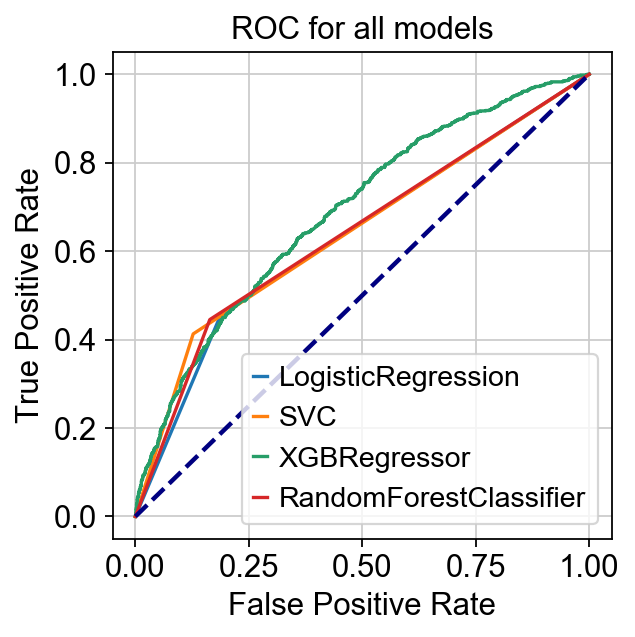

In [ ]:
models = [LogisticRegression(max_iter=1000, random_state=551),SVC(gamma='scale', random_state=551),XGBRegressor(random_state=551),RandomForestClassifier(max_depth=100, random_state=551)]

perf = {}

model_names = []

auroc_val = []
fit=[None]*6
i=0
for model in models:
    fit[i] = model.fit(rbX_train, rbY_train)
    y_test_prob = fit[i].predict(rbX_test)
    fpr, tpr, _ = roc_curve(rbY_test, y_test_prob)
    auroc = roc_auc_score(rbY_test, y_test_prob)
    perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    auroc_val.append(auroc)
    i=i+1


plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
    model_names.append(model_name)


plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()

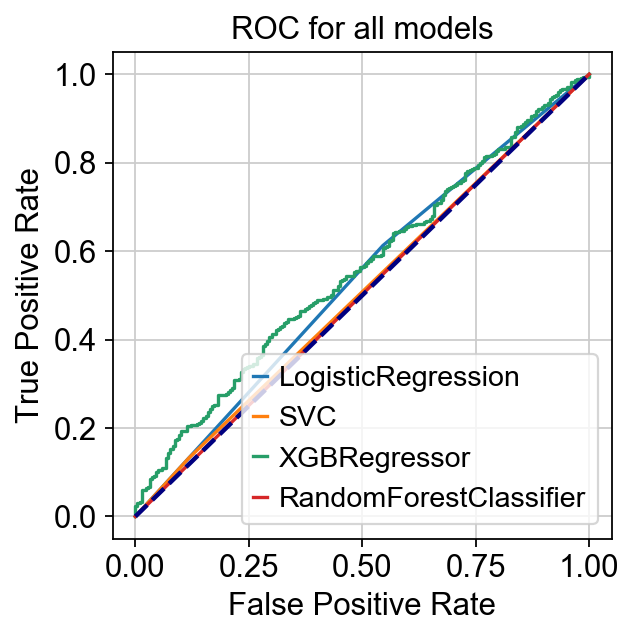

In [ ]:
models = [LogisticRegression(max_iter=1000, random_state=551),SVC(gamma='scale', random_state=851),XGBRegressor(random_state=551),RandomForestClassifier(max_depth=100, random_state=551)]

perf = {}

model_names = []

auroc_val = []
fit=[None]*6
i=0
for model in models:
    fit[i] = model.fit(rbX_train, rbY_train)
    y_test_prob = fit[i].predict(realtest)
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    auroc_val.append(auroc)
    i=i+1


plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
    model_names.append(model_name)


plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()

[0 1 2 3]
[0.7620156440746937, 0.5135746606334841, 0.8028526611969213, 0.7913404586099798]
['LogisticRegression', 'SVC', 'XGBRegressor', 'RandomForestClassifier']


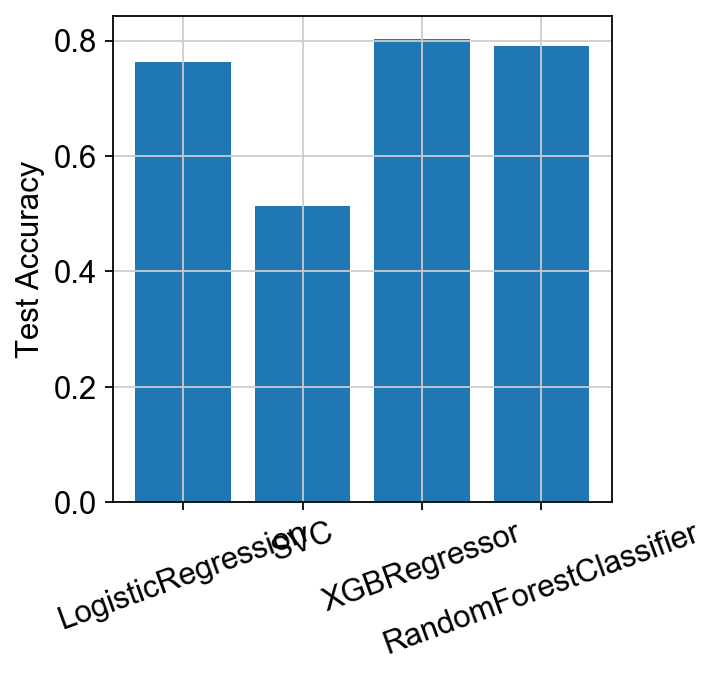

In [ ]:
pos = np.arange(len(model_names))
print(pos)
print(auroc_val)
print(model_names)
plt.bar(pos, auroc_val)
plt.ylabel('Test Accuracy')
plt.xticks(pos, model_names)
plt.xticks(rotation = 20)
plt.show()

In [ ]:

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Generate a random matr
# Initialize the Scaler
scaler = MinMaxScaler()

# Fit and transform the matrix
take_test= scaler.fit_transform(realtest)


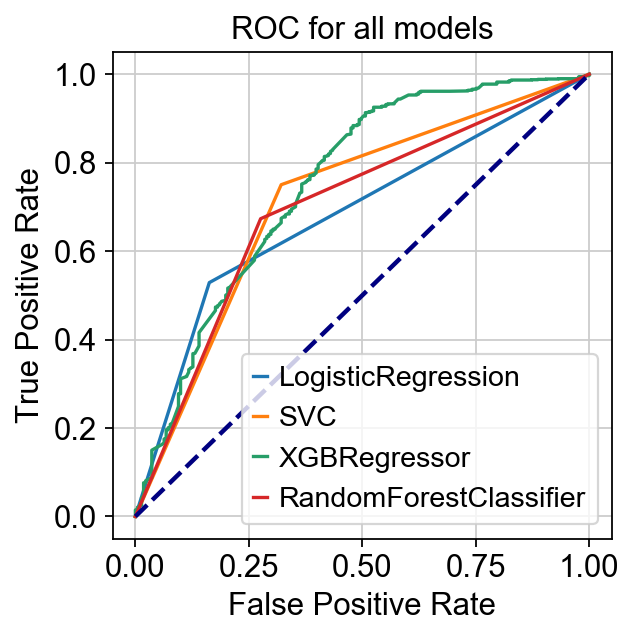

In [ ]:
models = [LogisticRegression(max_iter=1000, random_state=551),SVC(gamma='scale', random_state=851),XGBRegressor(random_state=551),RandomForestClassifier(max_depth=100, random_state=551)]

perf = {}

model_names = []

auroc_val = []
fit=[None]*6
i=0
for model in models:
    fit[i] = model.fit(rbX_train, rbY_train)
    y_test_prob = fit[i].predict(take_test)
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    auroc_val.append(auroc)
    i=i+1


plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
    model_names.append(model_name)


plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()

[0 1 2 3]
[0.6829640269754209, 0.7144625957756129, 0.7516424887225628, 0.6986550547612175]
['LogisticRegression', 'SVC', 'XGBRegressor', 'RandomForestClassifier']


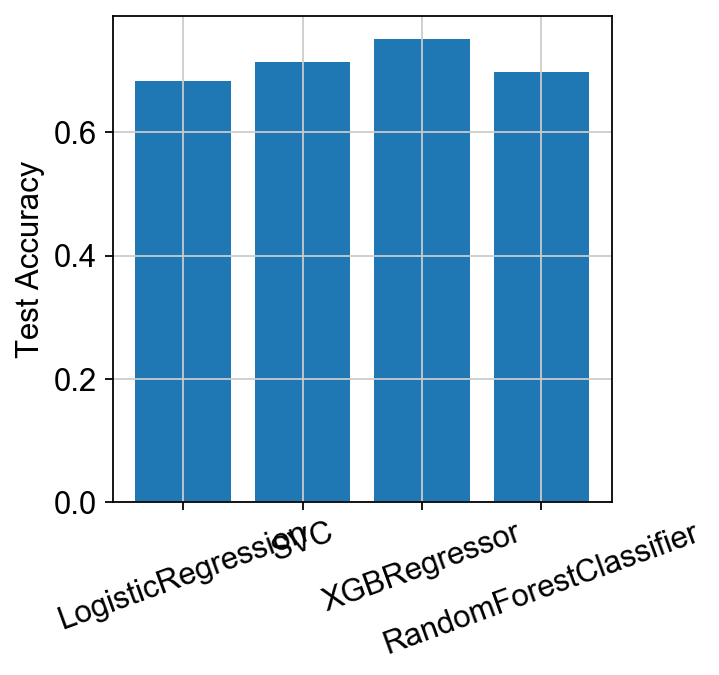

In [ ]:
pos = np.arange(len(model_names))
print(pos)
print(auroc_val)
print(model_names)
plt.bar(pos, auroc_val)
plt.ylabel('Test Accuracy')
plt.xticks(pos, model_names)
plt.xticks(rotation = 20)
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Create a dictionary to store performance metrics
perf = {}
model_names = []
auroc_val = []
f1_scores = []

models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851),
    XGBRegressor(
        random_state=551,
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
    ),
    RandomForestClassifier(max_depth=100, random_state=551),
]

# For XGBRegressor, you can tune hyperparameters using GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

xgb_model = XGBRegressor(random_state=551)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(rbX_train, rbY_train)
best_xgb_model = grid_search.best_estimator_

models[2] = best_xgb_model  # Replace the original XGBRegressor model with the tuned one 

# Train and evaluate models
for i, model in enumerate(models):
    model.fit(rbX_train, rbY_train)
    y_test_prob = model.predict(realtest)
    
    # Calculate F1 Score
    y_pred = [1 if prob > 0.5 else 0 for prob in y_test_prob]
    f1 = f1_score(realtest_y, y_pred)
    f1_scores.append(f1)
    
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc, 'f1': f1}
    auroc_val.append(auroc)

# Print F1 Scores
for model_name, f1 in zip(perf.keys(), f1_scores):
    print(f"F1 Score for {model_name}: {f1:.4f}")

# ... [the rest of your plotting code remains unchanged]

# Plot ROC curve
plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.4s
[CV] END colsampl

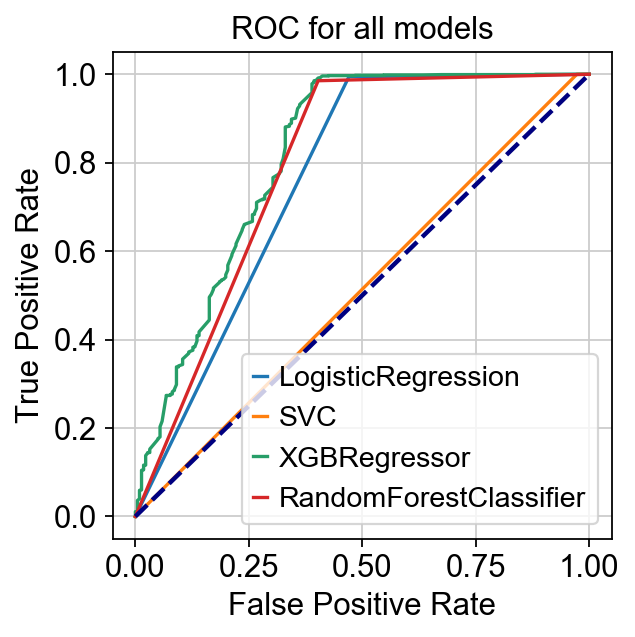

In [ ]:
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Create a dictionary to store performance metrics
perf = {}
model_names = []
auroc_val = []

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851),
    XGBRegressor(
        random_state=551,
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
    ),
    RandomForestClassifier(max_depth=100, random_state=551),
]

# For XGBRegressor, you can tune hyperparameters using GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

xgb_model = XGBRegressor(random_state=551)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(rbX_train, rbY_train)
best_xgb_model = grid_search.best_estimator_

models[2] = best_xgb_model  # Replace the original XGBRegressor model with the tuned one

# Train and evaluate models
for i, model in enumerate(models):
    model.fit(rbX_train, rbY_train)
    y_test_prob = model.predict(realtest)
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)

# Plot ROC curve
plt.clf()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


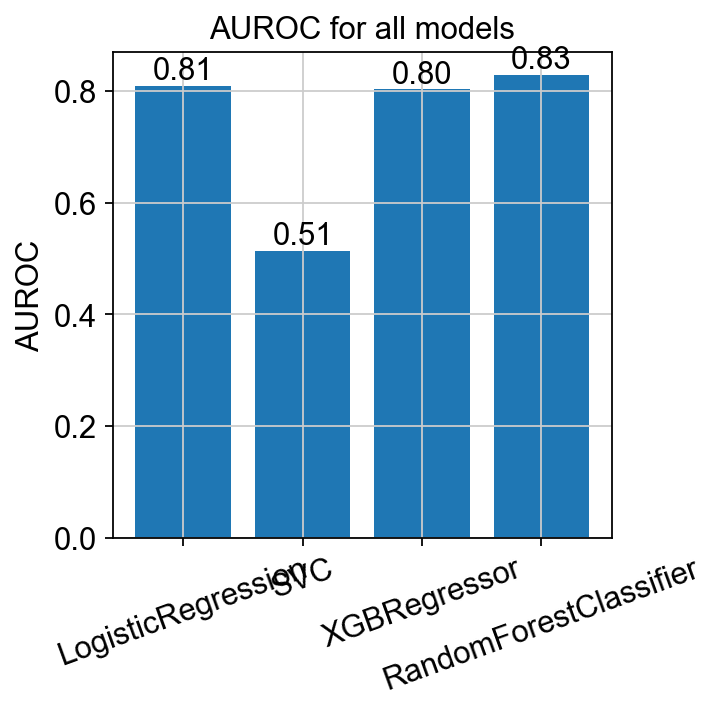

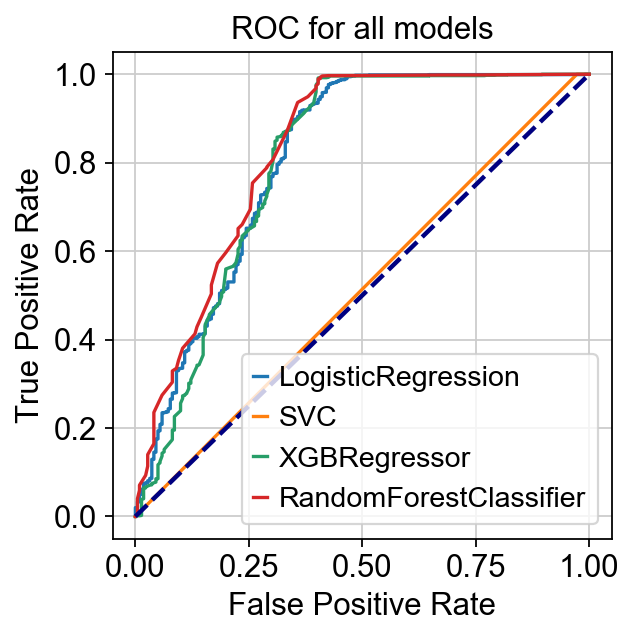

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851),
    XGBRegressor(random_state=551),
    RandomForestClassifier(max_depth=100, random_state=551)
]

# Create dictionaries for performance metrics
perf = {}
model_names = []
auroc_val = []

# Train and evaluate models
for model in models:
    model.fit(rbX_train, rbY_train)
    y_test_prob = model.predict(realtest)
    
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(realtest)[:, 1]

    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)
    model_names.append(type(model).__name__)


# Create bar plot for AUROC values
plt.figure()
bars = plt.bar(pos, auroc_val)
plt.ylabel('AUROC')
plt.xticks(pos, model_names)
plt.xticks(rotation = 20)
plt.title('AUROC for all models')

# Add the data value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# Create ROC curve plot
plt.figure()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


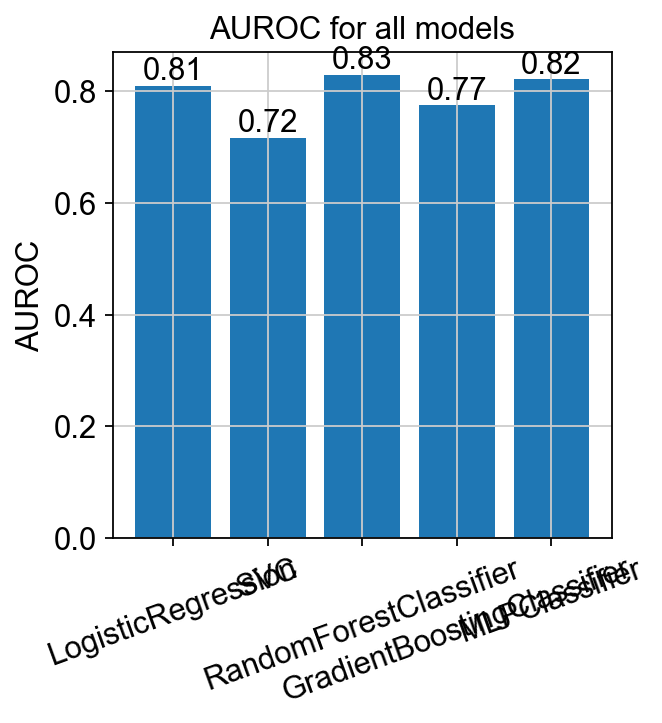

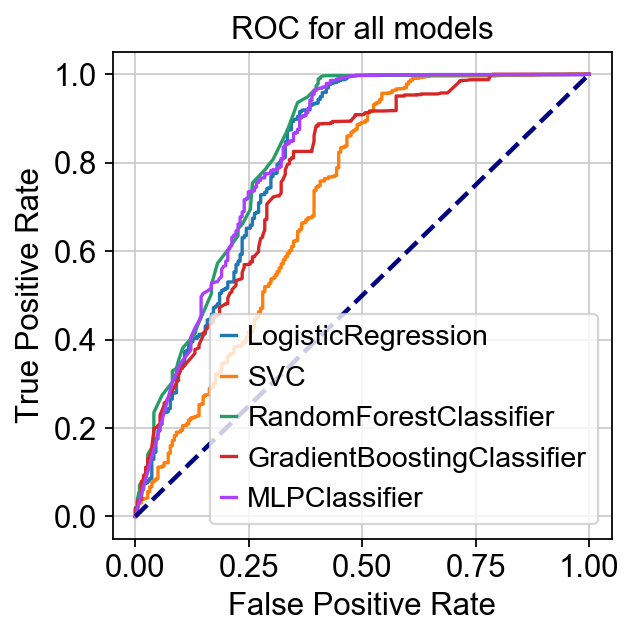

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851, probability=True),
 
    RandomForestClassifier(max_depth=100, random_state=551),
    
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=551),
    MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=551)  # Neural Network

]

# Add ensemble model
 

# Create dictionaries for performance metrics
perf = {}
model_names = []
auroc_val = []

# Train and evaluate models
for model in models:
    model.fit(rbX_train, rbY_train)
    
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(realtest)[:, 1]
    else:
        y_test_prob = model.decision_function(realtest)  # For models like SVM that do not have predict_proba
    
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)
    model_names.append(type(model).__name__)

# Bar plot for AUROC values
plt.figure()
pos = np.arange(len(model_names))
bars = plt.bar(pos, auroc_val)
plt.ylabel('AUROC')
plt.xticks(pos, model_names)
plt.xticks(rotation=20)
plt.title('AUROC for all models')

# Add the data value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# ROC curve plot
plt.figure()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


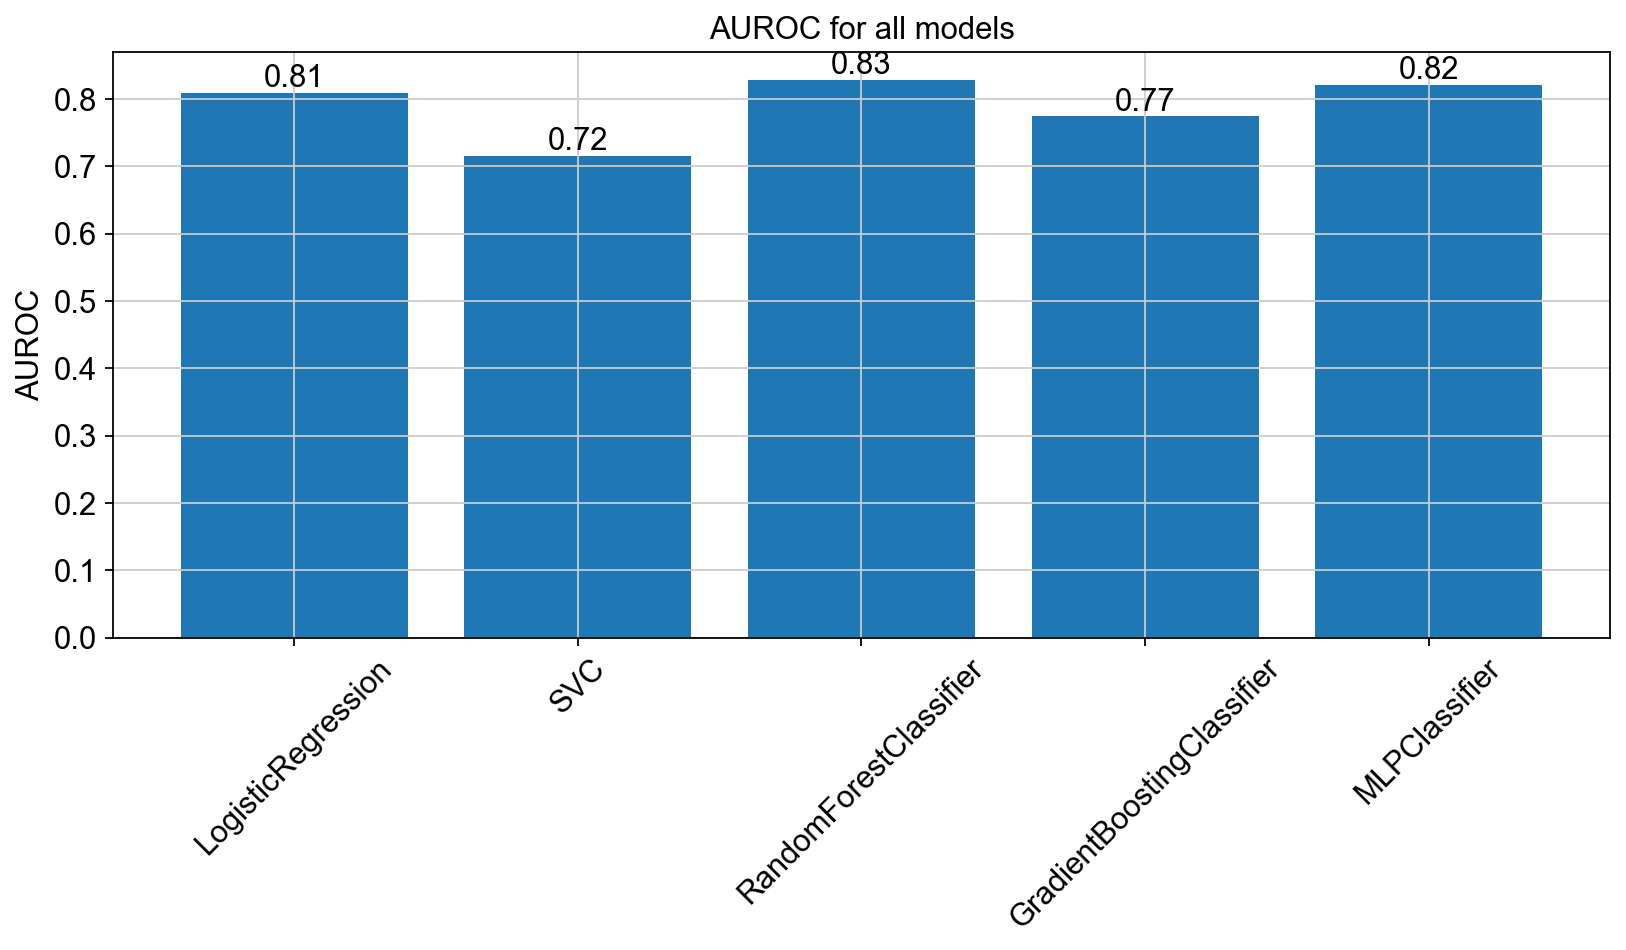

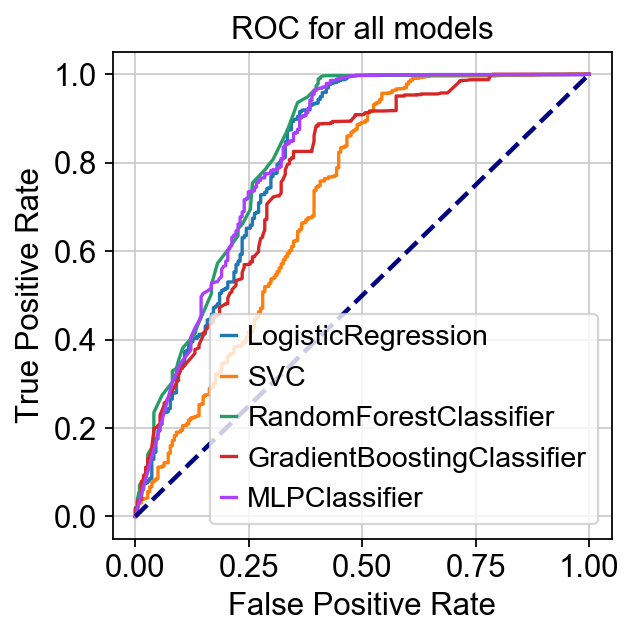

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851, probability=True),
    RandomForestClassifier(max_depth=100, random_state=551),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=551),
    MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=551)  # Neural Network
]

# Create dictionaries for performance metrics
perf = {}
model_names = []
auroc_val = []

# Train and evaluate models
for model in models:
    model.fit(rbX_train, rbY_train)
    
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(realtest)[:, 1]
    else:
        y_test_prob = model.decision_function(realtest)
    
    fpr, tpr, _ = roc_curve(realtest_y, y_test_prob)
    auroc = roc_auc_score(realtest_y, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)
    model_names.append(type(model).__name__)

# Bar plot for AUROC values with modified layout
plt.figure(figsize=(12, 6))
pos = np.arange(len(model_names))
bars = plt.bar(pos, auroc_val)
plt.ylabel('AUROC')
plt.xticks(pos, model_names)
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.subplots_adjust(bottom=0.3)  # Add extra space at the bottom
plt.title('AUROC for all models')

# Add the data value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# ROC curve plot
plt.figure()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


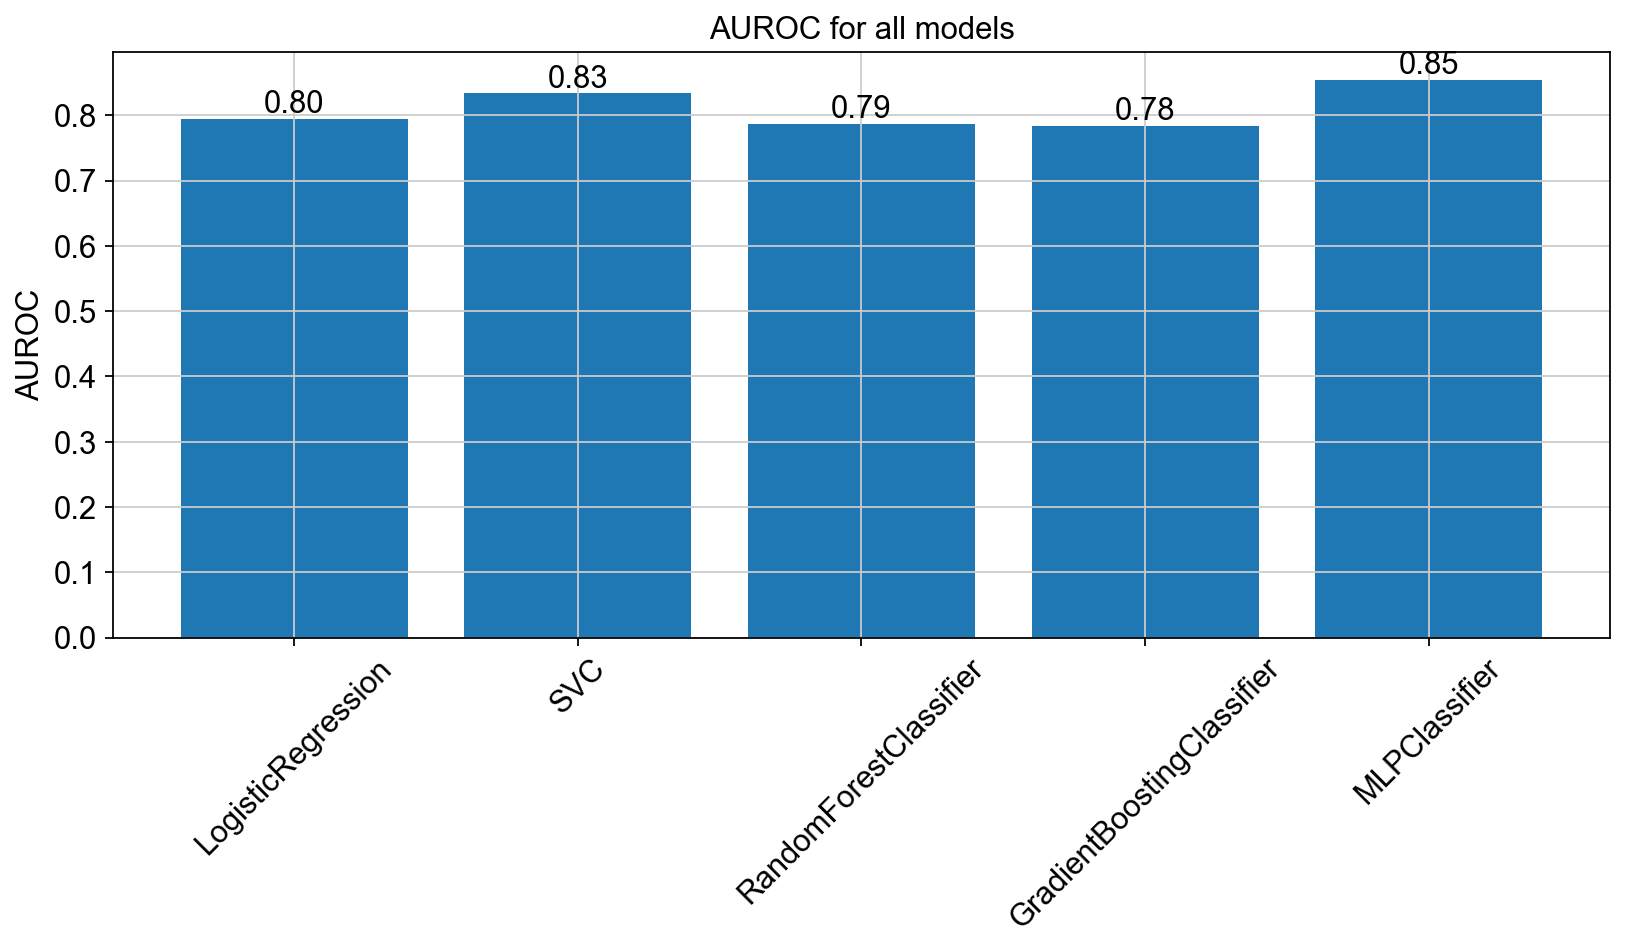

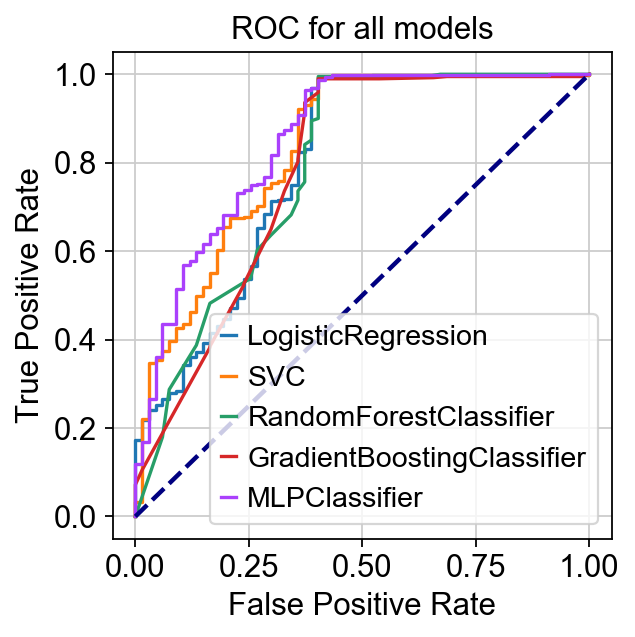

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Split 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(realtest, realtest_y, test_size=0.3, random_state=42)

# Initialize models
models = [
    LogisticRegression(max_iter=1000, random_state=551),
    SVC(gamma='scale', random_state=851, probability=True),
    RandomForestClassifier(max_depth=100, random_state=551),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=551),
    MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=551)  # Neural Network
]

# Create dictionaries for performance metrics
perf = {}
model_names = []
auroc_val = []

# Train and evaluate models
for model in models:
    model.fit(X_train, y_train)
    
    if hasattr(model, "predict_proba"):
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_test_prob = model.decision_function(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    auroc = roc_auc_score(y_test, y_test_prob)
    perf[type(model).__name__] = {'fpr': fpr, 'tpr': tpr, 'auroc': auroc}
    auroc_val.append(auroc)
    model_names.append(type(model).__name__)

# Bar plot for AUROC values
plt.figure(figsize=(12, 6))
pos = np.arange(len(model_names))
bars = plt.bar(pos, auroc_val)
plt.ylabel('AUROC')
plt.xticks(pos, model_names)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.3)
plt.title('AUROC for all models')

# Add the data value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

# ROC curve plot
plt.figure()
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'], label=model_name)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC for all models')
plt.legend()
plt.show()


Index(['Sulf1', 'Khdc1a', 'Il1r2', 'Il1rl1', 'Ecrg4', 'Col3a1', 'Col5a2',
       'Slc40a1', 'Cavin2', 'Icos',
       ...
       'Ms4a1', 'Ms4a2', 'Gda', 'Ifit1', 'Kif11', 'Tspan7', 'Cfp', 'Bgn',
       'Vsig4', 'Alas2'],
      dtype='object', name='n', length=500)

In [ ]:
test_b_x=

In [ ]:
gene_list_expand = list(set(listtt))

In [ ]:
gene_list_expand

['Rpl35a',
 'Uba52',
 'Rnaset2a',
 'Eif2s3y',
 'Uty',
 'Gm42418',
 'mt-Co2',
 'Tsix',
 'Rpl36a-ps1',
 'mt-Cytb',
 'AY036118',
 'Wdr89',
 'Rps27',
 'Xist',
 'H2-Ab1',
 'Fkbp5',
 'mt-Co3',
 'Rps27rt',
 'Adh1',
 'Retnla',
 'H2-Eb1',
 'Rpl35',
 'Lars2',
 'Ddx3y',
 'Kdm5d',
 'Rpl9-ps6',
 'Gm20594',
 'Cd74']

# new

In [ ]:
ffrc=rc.loc[:, col_select_expand]
ffrc["y"] = pd.Categorical(joined_list)
reboot_training_data = ffrc.sample(frac=0.6, random_state=25)
reboot_testing_data = ffrc.drop(reboot_training_data.index)

rbY_train=reboot_training_data["y"]
rbX_train=reboot_training_data.drop(["y"],axis=1)
rbY_test=reboot_testing_data["y"]
rbX_test=reboot_testing_data.drop(["y"],axis=1)